# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [2]:
import numpy as np
import pandas
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pandas.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pandas.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pandas.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pandas.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pandas.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pandas.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")


# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
df_dict = {
    'df_hh_income': df_hh_income, 
    'df_pct_poverty': df_pct_poverty, 
    'df_pct_completed_hs': df_pct_completed_hs, 
    'df_share_race_city': df_share_race_city, 
    'df_fatalities': df_fatalities,  
}

##### Shape

In [6]:
for df in df_dict.keys():
    print(f"{df} shape: {df_dict[df].shape}\n")

df_hh_income shape: (29322, 3)

df_pct_poverty shape: (29329, 3)

df_pct_completed_hs shape: (29329, 3)

df_share_race_city shape: (29268, 7)

df_fatalities shape: (2535, 14)



##### How many rows and columns

In [7]:
for df in df_dict.keys():
    print(f'{df} Number of rows: {df_dict[df].shape[0]}')
    print(f'{df} Number of columns: {df_dict[df].shape[1]}\n')

df_hh_income Number of rows: 29322
df_hh_income Number of columns: 3

df_pct_poverty Number of rows: 29329
df_pct_poverty Number of columns: 3

df_pct_completed_hs Number of rows: 29329
df_pct_completed_hs Number of columns: 3

df_share_race_city Number of rows: 29268
df_share_race_city Number of columns: 7

df_fatalities Number of rows: 2535
df_fatalities Number of columns: 14



##### Column names

In [8]:
for df in df_dict.keys():
    print(f"{df} column names: {list(df_dict[df].columns)}\n")

df_hh_income column names: ['Geographic Area', 'City', 'Median Income']

df_pct_poverty column names: ['Geographic Area', 'City', 'poverty_rate']

df_pct_completed_hs column names: ['Geographic Area', 'City', 'percent_completed_hs']

df_share_race_city column names: ['Geographic area', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']

df_fatalities column names: ['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']



##### Any missing values?

In [9]:
for df in df_dict.keys():
    print(f"For {df}: {df_dict[df].isnull().values.any()}\n")

For df_hh_income: True

For df_pct_poverty: False

For df_pct_completed_hs: False

For df_share_race_city: False

For df_fatalities: True



##### Any duplicated values?

In [10]:
for df in df_dict.keys():
    print(f"For {df}: {df_dict[df].duplicated().any()}\n")

For df_hh_income: False

For df_pct_poverty: False

For df_pct_completed_hs: False

For df_share_race_city: False

For df_fatalities: False



## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

##### Filling any missing values with 0

In [11]:
for df in df_dict.keys():
    if df_dict[df].isnull().values.any() == True:
        df_dict[df] = df_dict[df].fillna(0)
        print(f"Number of MISSING VALUES for {df}: {df_dict[df].isnull().values.sum()}\n")
    else:
        pass

Number of MISSING VALUES for df_hh_income: 0

Number of MISSING VALUES for df_fatalities: 0



### Making some ajustments in the `df_share_race_city` dataframe


##### Some rows have `ALL THEIR VALUES`  of the `share_<race-name-here>` columns as a string '(X)' as a value. We are going to drop those rows

In [12]:
rows_to_drop = df_share_race_city[df_share_race_city['share_white'] == '(X)'].index

In [13]:
df_share_race_city = df_share_race_city.drop(rows_to_drop)

##### Changing the data type to float so we can perform mathematical operations

In [14]:
df_share_race_city['share_white'] = df_share_race_city['share_white'].astype(float)
df_share_race_city['share_black'] = df_share_race_city['share_black'].astype(float)
df_share_race_city['share_native_american'] = df_share_race_city['share_native_american'].astype(float)
df_share_race_city['share_asian'] = df_share_race_city['share_asian'].astype(float)
df_share_race_city['share_hispanic'] = df_share_race_city['share_hispanic'].astype(float)


##### Creating a column which represent the sum of all the columns `share_<race-name-here>`

In [15]:
df_share_race_city['sum_of_all_shares'] = df_share_race_city['share_white'] + df_share_race_city['share_black'] + df_share_race_city['share_native_american'] + df_share_race_city['share_asian'] + df_share_race_city['share_hispanic']


##### Converting the values of all `share_<race-name-here>` to percentages
* We are going to assume the values are displayed in the thousands (example: if value is 52.30 that means 52300)
* We `DO NOT ASSUME` the values constitute percentages because the `sum of all values per row` is sometimes `greater than 100`, hence the values cannot represent percentages, even if the name `share` of the column names would suggest otherwise

In [16]:
df_share_race_city['share_white'] = df_share_race_city['share_white'] / df_share_race_city['sum_of_all_shares']  * 100
df_share_race_city['share_black'] = df_share_race_city['share_black'] / df_share_race_city['sum_of_all_shares']  * 100
df_share_race_city['share_native_american'] = df_share_race_city['share_native_american'] / df_share_race_city['sum_of_all_shares']  * 100
df_share_race_city['share_asian'] = df_share_race_city['share_asian'] / df_share_race_city['sum_of_all_shares']  * 100
df_share_race_city['share_hispanic'] = df_share_race_city['share_hispanic'] / df_share_race_city['sum_of_all_shares']  * 100


##### Rounding all values in the dataframe at once

In [17]:
df_share_race_city = df_share_race_city.round(2)

##### Finally, droppingh the `sum_of_all_shares` column - we are not going to need it anymore

In [18]:
df_share_race_city = df_share_race_city.drop('sum_of_all_shares', axis=1)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

##### Many entries in the `poverty_rate` column have the value `-` , meaning no data is avaible
* we are now going to drop those values

In [19]:
no_poverty_rate_data = df_pct_poverty[df_pct_poverty['poverty_rate'].str.contains('-')].index

In [20]:
df_with_poverty_rate = df_pct_poverty.drop(no_poverty_rate_data)

##### Changing the data type to `float` so we can perform mathematical operations

In [21]:
df_with_poverty_rate['poverty_rate'] = df_with_poverty_rate['poverty_rate'].astype(float)

##### Grouping by state

In [22]:
df_poverty_rate_by_state = df_with_poverty_rate.groupby('Geographic Area', 
        as_index=False).agg({'poverty_rate': pandas.Series.mean}).sort_values('poverty_rate', ascending=False)


##### State with the `HIGHEST` poverty rate

In [23]:
state_highest_poverty_rate = df_poverty_rate_by_state[df_poverty_rate_by_state['poverty_rate'] == df_poverty_rate_by_state['poverty_rate'].max()]['Geographic Area'].values[0]


In [24]:
state_highest_poverty_rate

'MS'

* The state of `Mississippi` (`MS`) is the state with the `HIGHEST` poverty rate

##### State with the `LOWEST` poverty rate

In [25]:
state_lowest_poverty_rate = df_poverty_rate_by_state[df_poverty_rate_by_state['poverty_rate'] == df_poverty_rate_by_state['poverty_rate'].min()]['Geographic Area'].values[0]


In [26]:
state_lowest_poverty_rate

'NJ'

* The state of `New Jersey` (`NJ`) is the state with the `LOWEST` poverty rate

##### Creating a bar chart

In [27]:
bar = px.bar(x = df_poverty_rate_by_state['Geographic Area'], 
             y = df_poverty_rate_by_state['poverty_rate'], 
             title='Poverty Rate by State (including the District of Columbia).')

bar.update_layout(xaxis_title='State', yaxis_title='Poverty Rate (%)')
bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

##### Similarly to the previous question, many entries in the `percent_completed_hs` column have the value `-` , meaning no data is avaible
* we are now going to drop those values

In [28]:
no_hs_data = df_pct_completed_hs[df_pct_completed_hs['percent_completed_hs'].str.contains('-')].index


In [29]:
df_with_hs_data = df_pct_completed_hs.drop(no_hs_data)

##### Changing the data type to `float` so we can perform mathematical operations

In [30]:
df_with_hs_data['percent_completed_hs'] = df_with_hs_data['percent_completed_hs'].astype(float)


##### Grouping by state

In [31]:
df_complete_hs_by_state = df_with_hs_data.groupby('Geographic Area', 
        as_index=False).agg({'percent_completed_hs': 
                             pandas.Series.mean}).sort_values('percent_completed_hs')

##### State with the `HIGHEST` high school graduation rate

In [32]:
state_highest_hs_graduation_rate = df_complete_hs_by_state[df_complete_hs_by_state['percent_completed_hs'] == df_complete_hs_by_state['percent_completed_hs'].max()]['Geographic Area'].values[0]


In [33]:
state_highest_hs_graduation_rate

'MA'

* The state of `Massachusetts` (`MA`) is the state with the `HIGHEST` high school graduation rate

##### State with the `LOWEST` high school graduation rate

In [34]:
state_lowest_hs_graduation_rate = df_complete_hs_by_state[df_complete_hs_by_state['percent_completed_hs'] == df_complete_hs_by_state['percent_completed_hs'].min()]['Geographic Area'].values[0]


In [35]:
state_lowest_hs_graduation_rate

'TX'

* The state of `Texas` (`TX`) is the state with the `LOWEST` high school graduation rate

##### Creating a bar chart

In [36]:
bar = px.bar(x = df_complete_hs_by_state['Geographic Area'], 
             y = df_complete_hs_by_state['percent_completed_hs'], 
             title='High School graduation rate by State (including the District of Columbia).')

bar.update_layout(xaxis_title='State', yaxis_title='High School Graduation Rate (%)')
bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

##### Merging the two dataframes

In [37]:
df_merged_poverty_rate_hs_graduation_rate = pandas.merge(df_poverty_rate_by_state, df_complete_hs_by_state, on='Geographic Area')


##### Line Chart

In [38]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

# FOR THE FIRST (LEFT) Y AXIS
fig.add_trace(
    go.Scatter(x=df_merged_poverty_rate_hs_graduation_rate['Geographic Area'], 
               y=df_merged_poverty_rate_hs_graduation_rate['poverty_rate'], 
               name="Poverty Rate"),
    secondary_y=False,
)

# FOR THE SECOND (RIGHT) Y AXIS
fig.add_trace(
    go.Scatter(x=df_merged_poverty_rate_hs_graduation_rate['Geographic Area'], 
               y=df_merged_poverty_rate_hs_graduation_rate['percent_completed_hs'], 
               name="HS Graduation Rate"),
    secondary_y=True,
)

# Plot Title
fig.update_layout(
    title_text="Relationship between Poverty Rates and High School Graduation Rates per State (including the District of Columbia)"
)

# Axes Labels
fig.update_xaxes(title_text="States")
fig.update_yaxes(title_text="Poverty Rate (%)", secondary_y=False)
fig.update_yaxes(title_text="HS Graduation Rate (%)", secondary_y=True)

fig.show()

##### Line Chart alternative

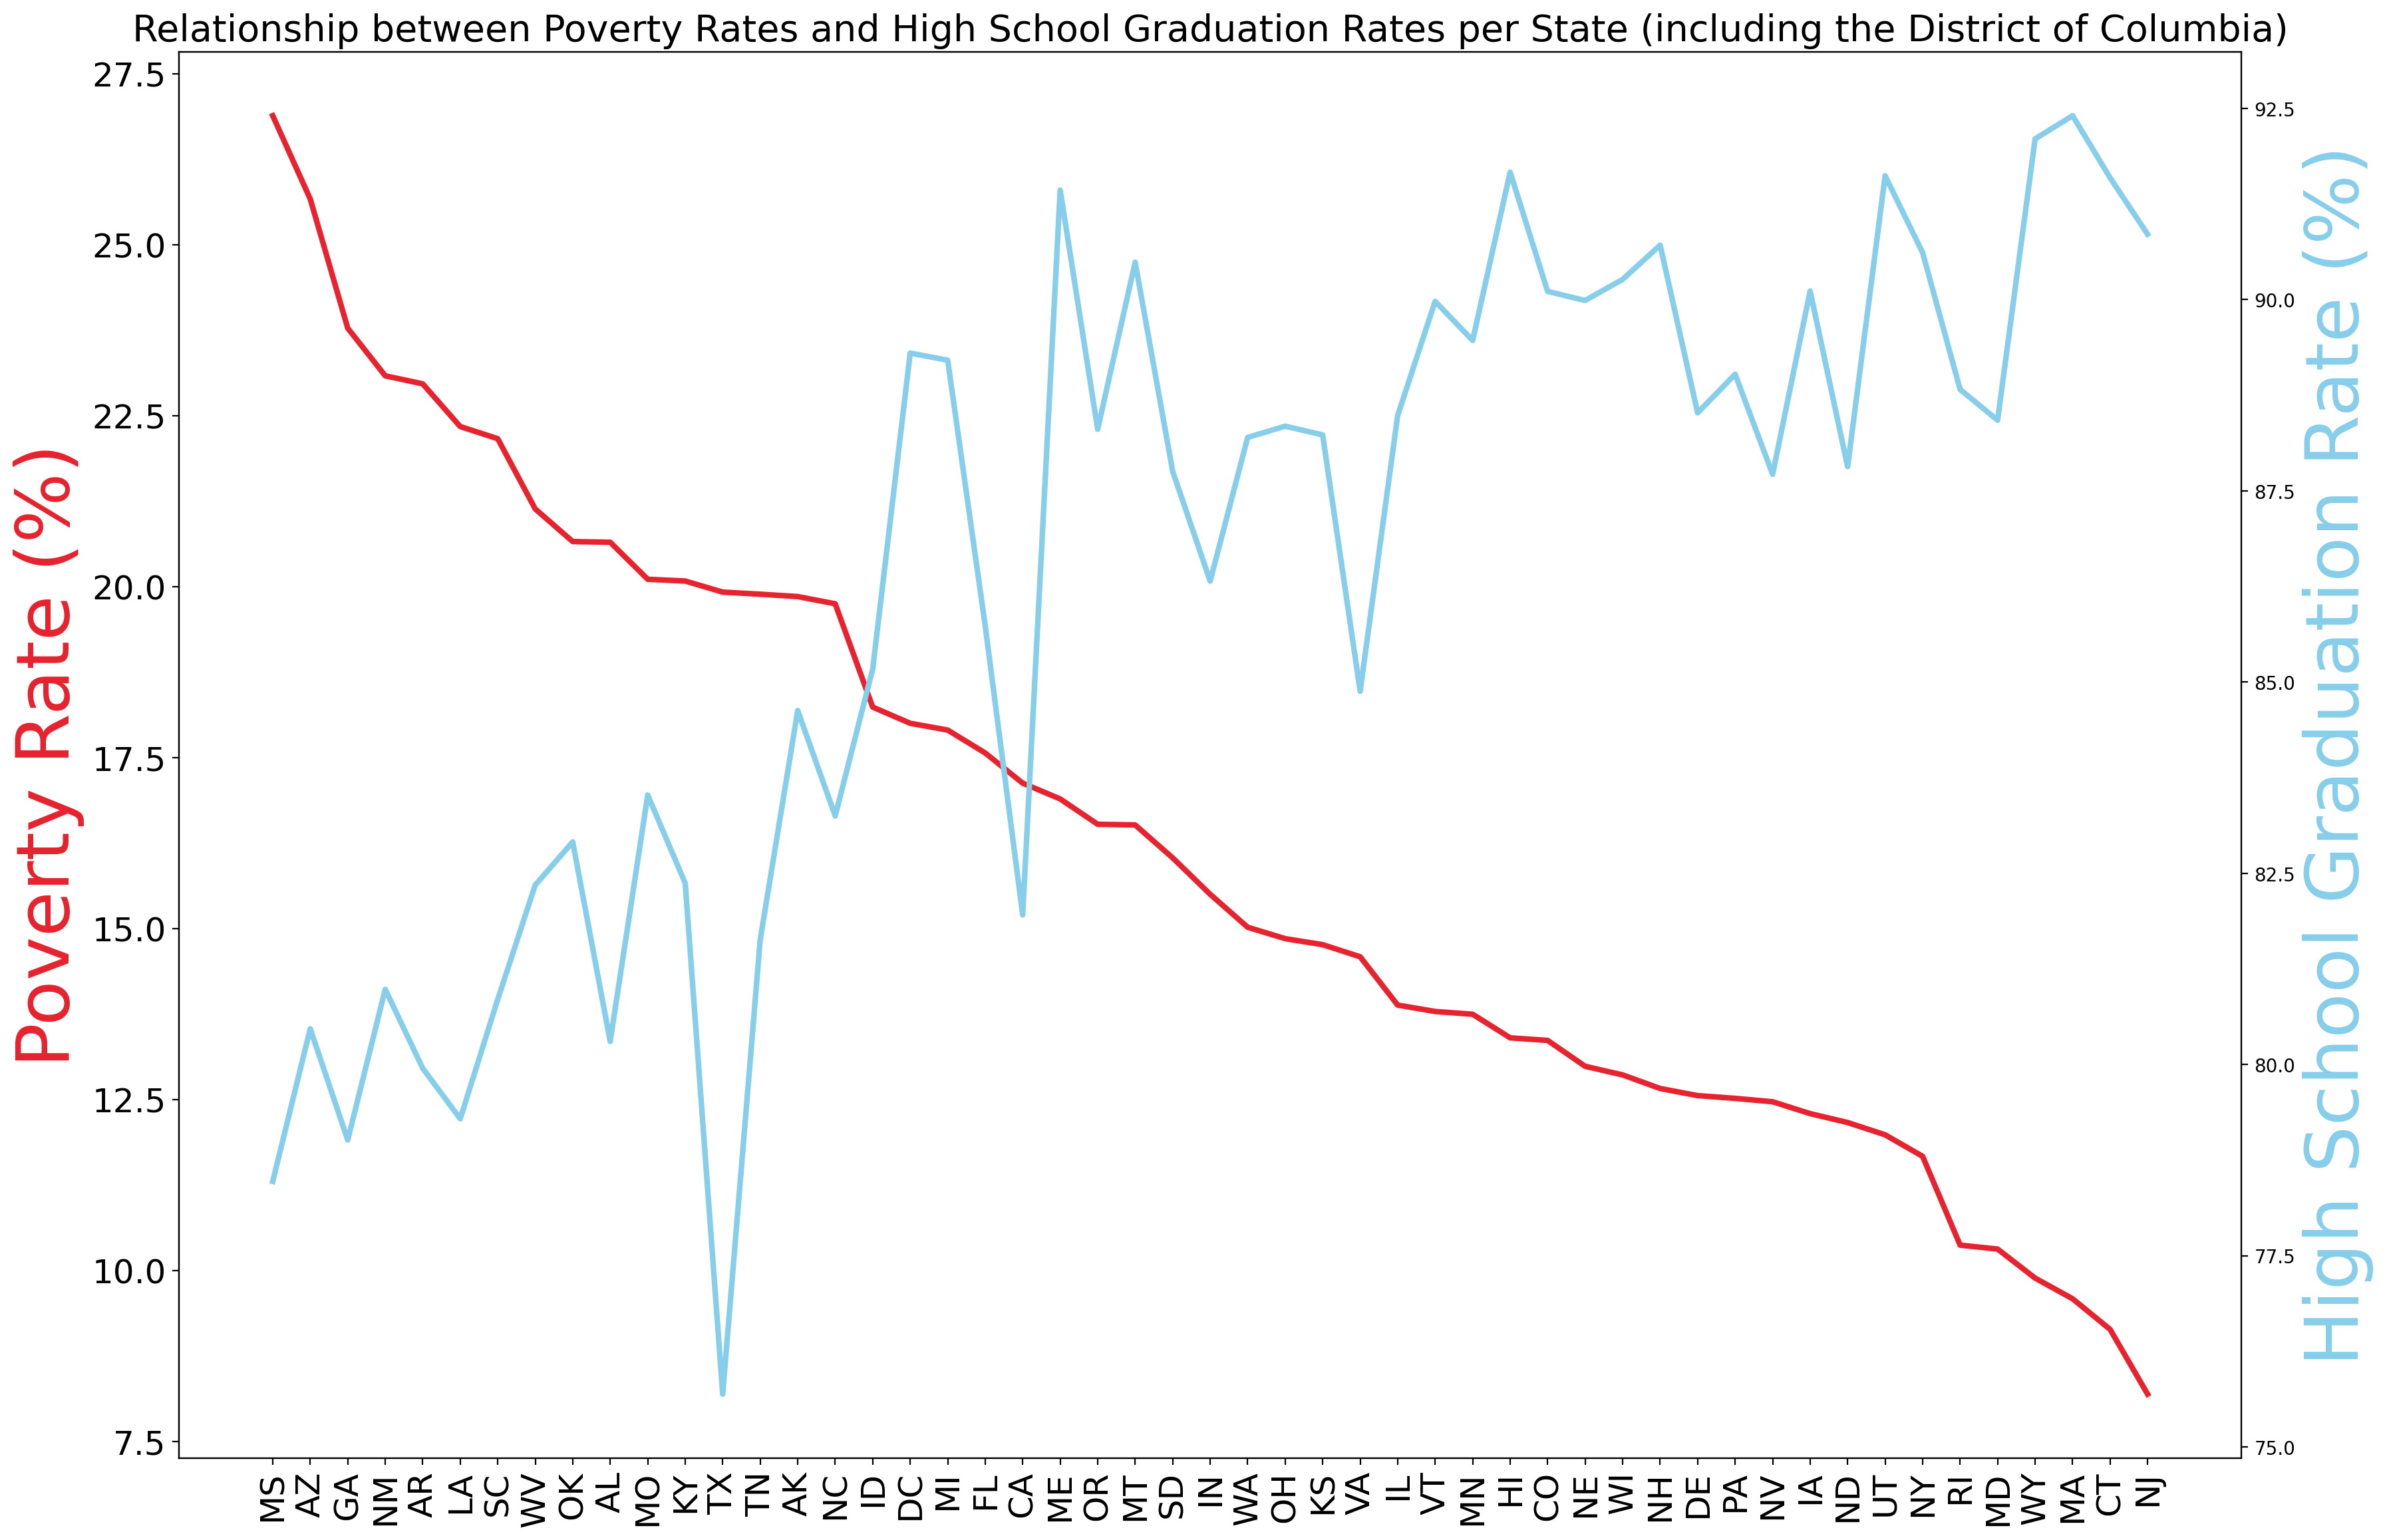

In [39]:
plt.figure(figsize=(20,14), dpi=200) 
plt.title('Relationship between Poverty Rates and High School Graduation Rates per State (including the District of Columbia)', fontsize=20)

plt.yticks(fontsize=18)
plt.xticks(fontsize=18, rotation=90)

ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()

ax1.set_ylabel('Poverty Rate (%)', color='#E6232E', fontsize=40) 
ax2.set_ylabel('High School Graduation Rate (%)', color='skyblue', fontsize=40) 


ax1.plot(df_merged_poverty_rate_hs_graduation_rate['Geographic Area'], 
         df_merged_poverty_rate_hs_graduation_rate['poverty_rate'], 
         color='#E6232E', linewidth=3)

ax2.plot(df_merged_poverty_rate_hs_graduation_rate['Geographic Area'], 
         df_merged_poverty_rate_hs_graduation_rate['percent_completed_hs'], 
         color='skyblue', linewidth=3)

plt.show()


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

##### .jointplot() with a Kernel Density Estimate (KDE)

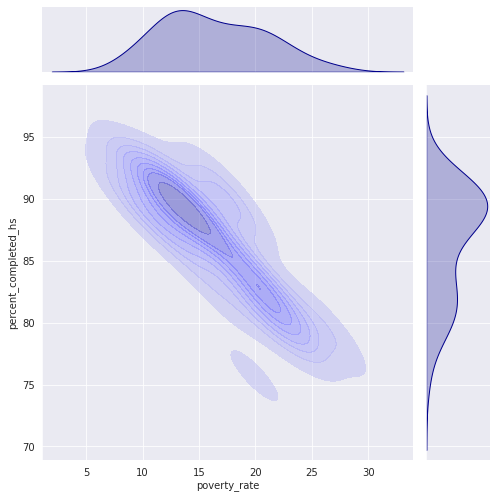

In [40]:
with sns.axes_style('darkgrid'):
    sns.jointplot(data=df_merged_poverty_rate_hs_graduation_rate,
                  x="poverty_rate", 
                  y="percent_completed_hs",
                  height=7,
                  kind='kde', 
                  color='darkblue', 
                  shade=True, 
                  fill=True, 
                  joint_kws={'alpha':0.5});

##### Scatterplot

In [41]:
scatter = px.scatter(df_merged_poverty_rate_hs_graduation_rate,
                    x='poverty_rate', 
                    y='percent_completed_hs',
                    title='Poverty rate and HS graduation rate distribution by state',
                    hover_name='Geographic Area',
                    color='Geographic Area')

scatter.update_layout(xaxis_title="Poverty Rate (%)",
                      yaxis_title="HS Graduation Rate (%)")
 
scatter.show()

##### Scatterplot alternative

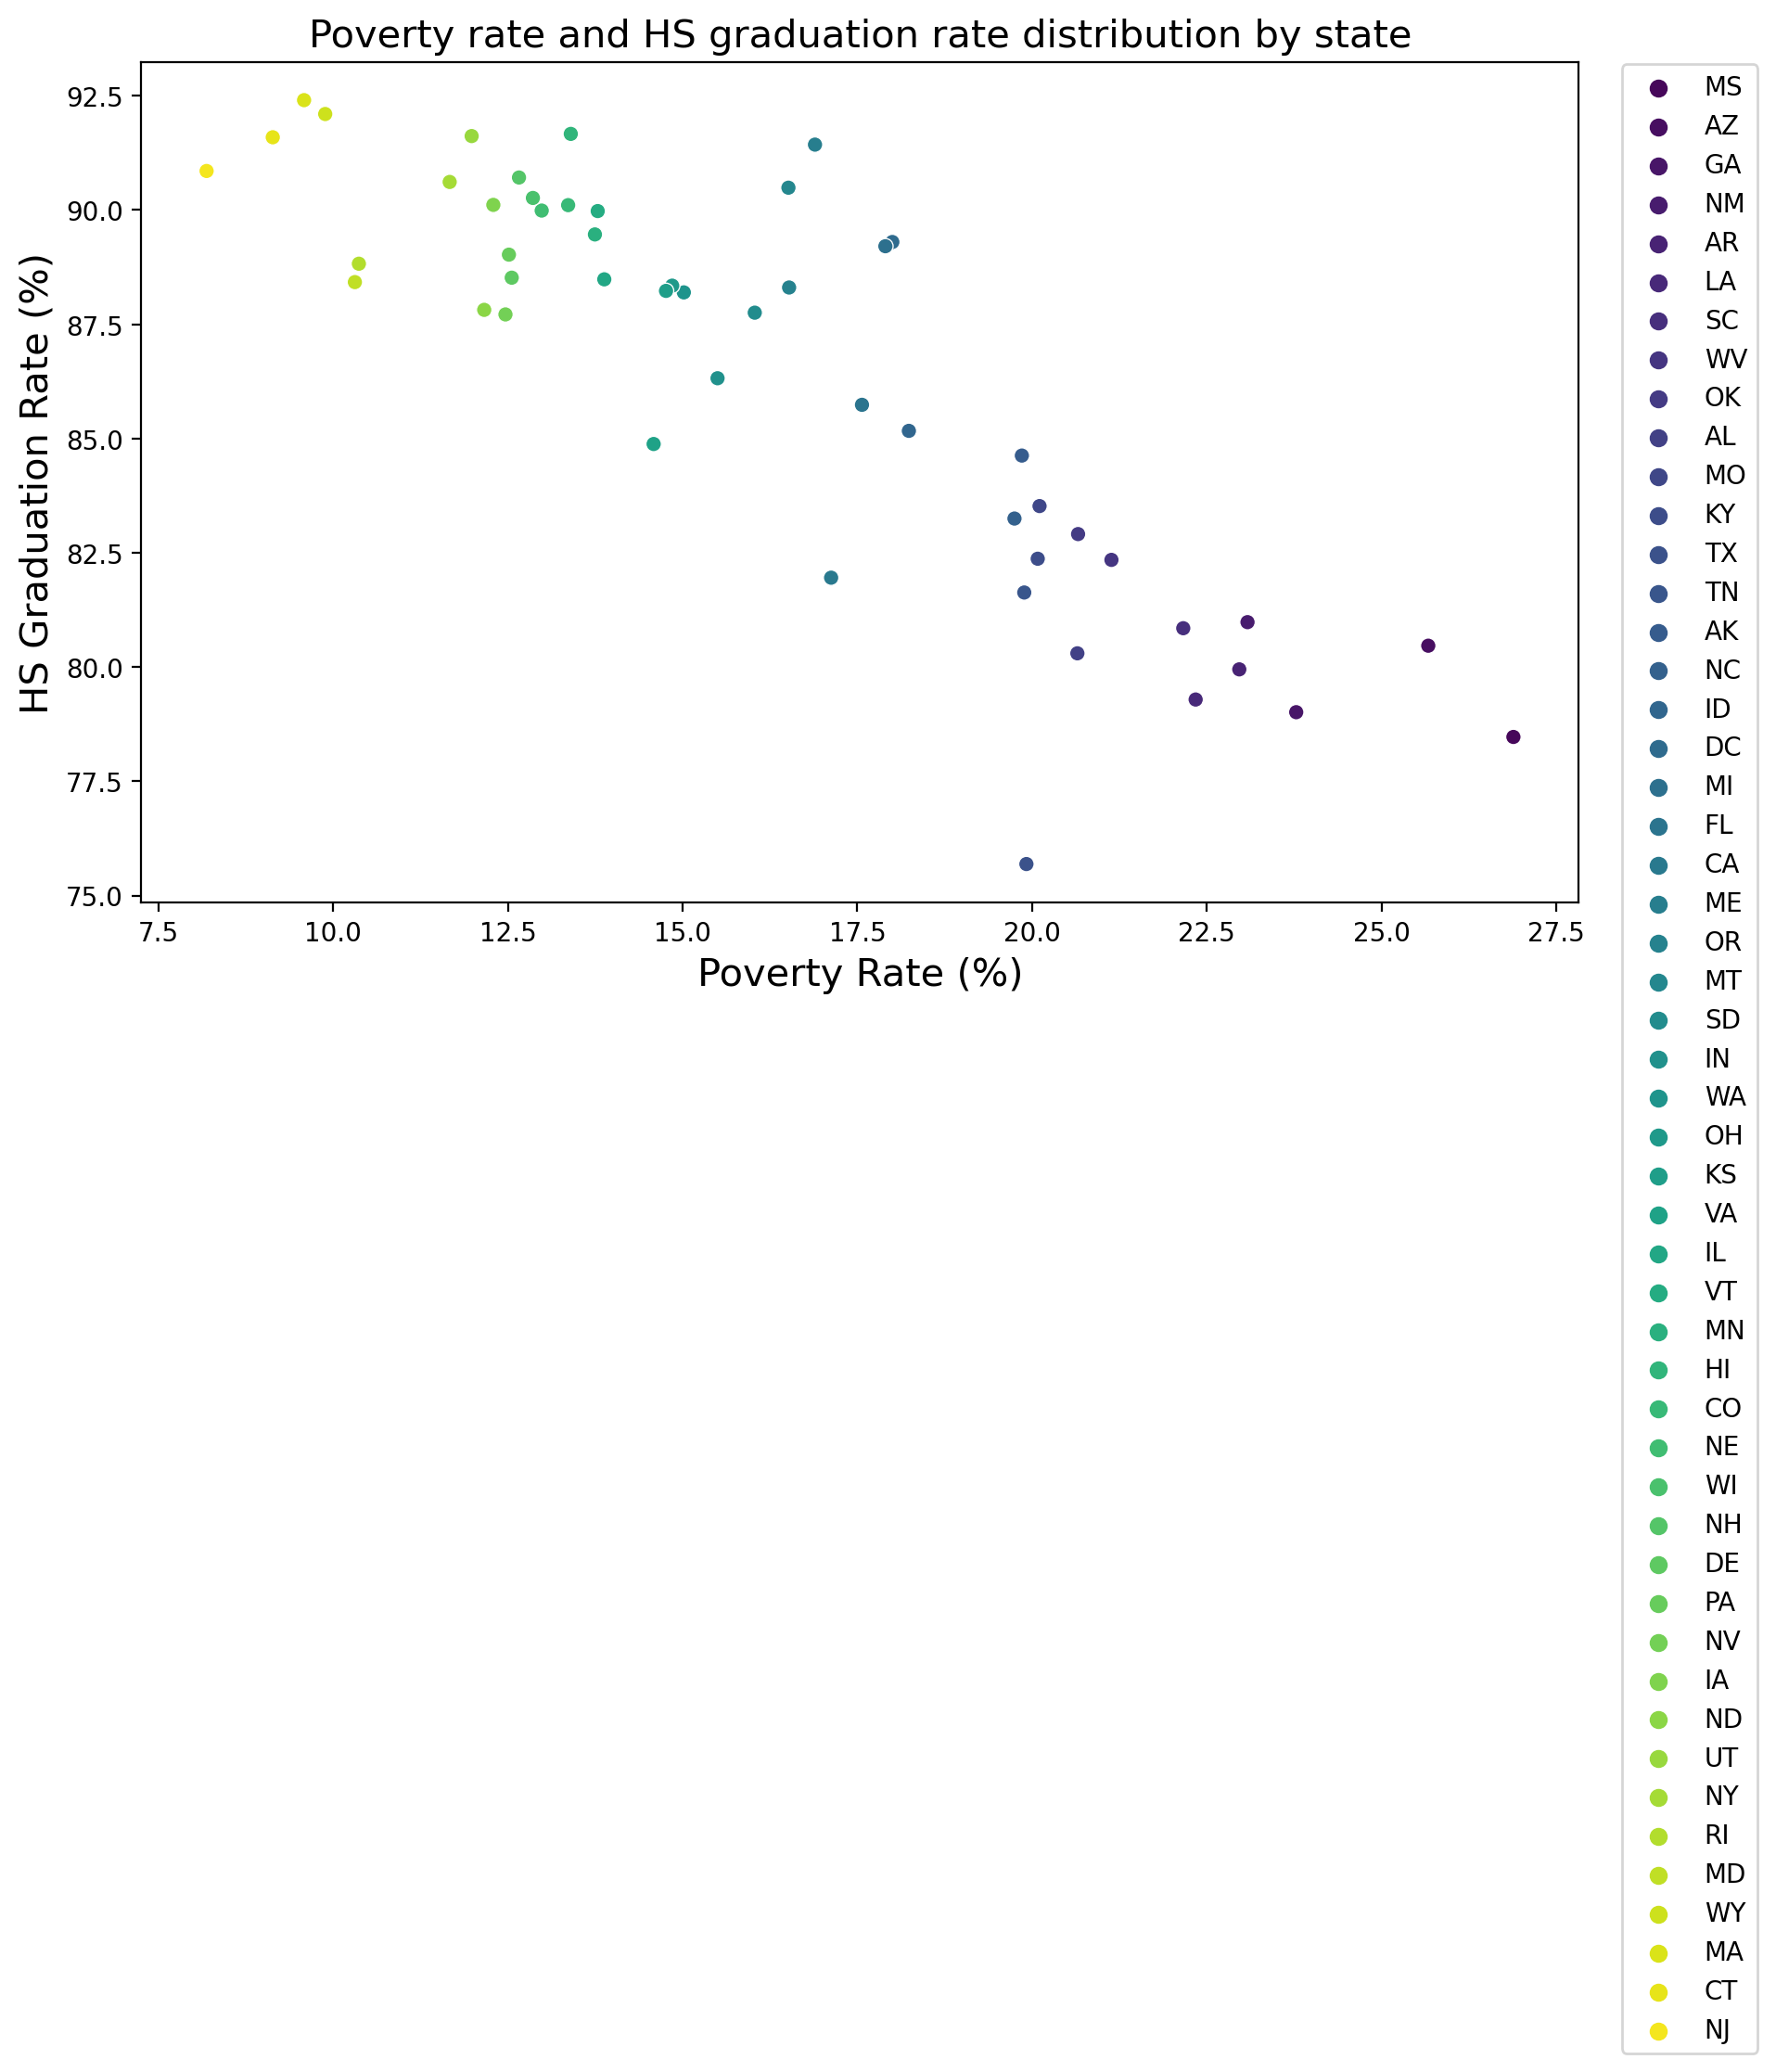

In [42]:
plt.figure(figsize=(10,6), dpi=200)
plt.title('Poverty rate and HS graduation rate distribution by state', fontsize=15)

sns.scatterplot(data=df_merged_poverty_rate_hs_graduation_rate, 
                x='poverty_rate', 
                y='percent_completed_hs', 
                hue='Geographic Area', 
                palette='viridis')

plt.xlabel('Poverty Rate (%)', fontsize=15)
plt.ylabel('HS Graduation Rate (%)', fontsize=15)
plt.legend(loc=(1.03,-1.37));

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

##### Using `.regplot()`

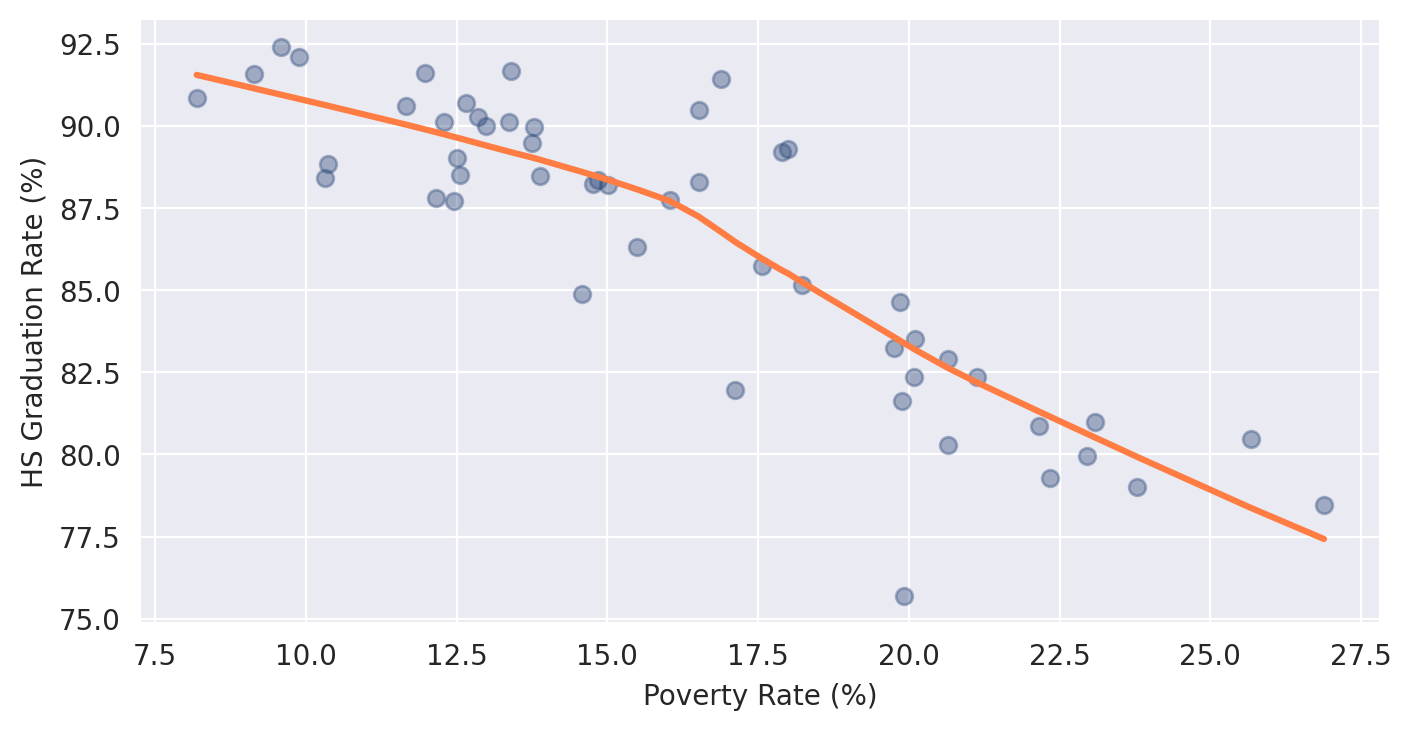

In [43]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
    ax = sns.regplot(data=df_merged_poverty_rate_hs_graduation_rate, 
                     x='poverty_rate', 
                     y='percent_completed_hs', 
                     lowess=True,
                     color='#2f4b7c', 
                     scatter_kws = {'alpha': 0.4}, 
                     line_kws = {'color': '#ff7c43'})
  
    ax.set(xlabel='Poverty Rate (%)', 
           ylabel='HS Graduation Rate (%)')

##### Using `.lmplot()`

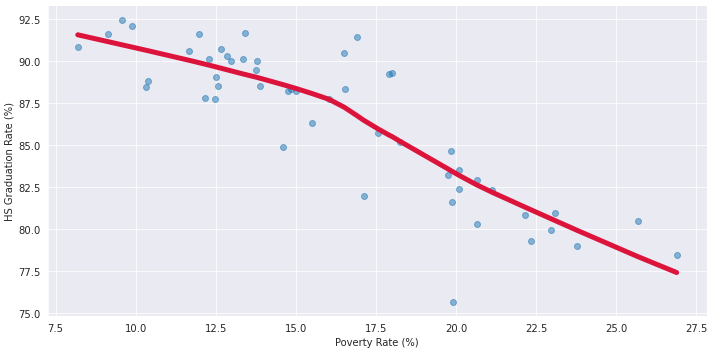

In [44]:
with sns.axes_style("darkgrid"):
    ax = sns.lmplot(data=df_merged_poverty_rate_hs_graduation_rate,
                       x='poverty_rate',
                       y='percent_completed_hs',
                       #hue='Geographic Area', #experiment with taking this off
                       lowess=True, 
                       aspect=2,
                       scatter_kws={'alpha': 0.5},
                       line_kws={'linewidth': 5, 'color': 'crimson'})
    
    ax.set(xlabel='Poverty Rate (%)', 
           ylabel='HS Graduation Rate (%)')

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

##### Grouping by state

In [45]:
df_share_race_by_state = df_share_race_city.groupby('Geographic area', as_index=False).mean()

##### Rounding every value at once

In [46]:
df_share_race_by_state = df_share_race_by_state.round(2)

##### Bar chart with sub sections

In [47]:
fig = go.Figure()

fig.add_trace(go.Bar(x = df_share_race_by_state['Geographic area'], 
                     y = df_share_race_by_state['share_white'],
                     width = 0.5, 
                     name = 'White',
                     text = df_share_race_by_state['share_white']))

fig.add_trace(go.Bar(x = df_share_race_by_state['Geographic area'], 
                     y = df_share_race_by_state['share_black'],
                     width = 0.5, 
                     name = 'Black',
                     text = df_share_race_by_state['share_black']))

fig.add_trace(go.Bar(x = df_share_race_by_state['Geographic area'], 
                     y = df_share_race_by_state['share_native_american'],
                     width = 0.5, 
                     name = 'Native American',
                     text = df_share_race_by_state['share_native_american']))

fig.add_trace(go.Bar(x = df_share_race_by_state['Geographic area'], 
                     y = df_share_race_by_state['share_asian'],
                     width = 0.5, 
                     name = 'Asian',
                     text = df_share_race_by_state['share_asian']))

fig.add_trace(go.Bar(x = df_share_race_by_state['Geographic area'], 
                     y = df_share_race_by_state['share_hispanic'],
                     width = 0.5, 
                     name = 'Hispanic',
                     text = df_share_race_by_state['share_hispanic']))


fig.update_layout(
    title = "Population's Racial Distribution by State", 
    barmode = 'relative', 
    title_font_size = 40, 
    width = 2600, 
    height = 2400
)


fig.update_layout(
    legend=go.layout.Legend(
        x=1,
        y=1, 
        traceorder= "normal", 
        font=dict(family="Verdana",size= 22, color = "black")
    )
)


fig.update_xaxes(
    title_text = 'State', 
    title_font=dict(size=30,family='Verdana',color='black'),
    tickfont=dict(family='Calibri', color='darkred', size=25)
)


fig.update_yaxes(
    title_text = "Percentage", 
    title_font=dict(size=30, family='Verdana', color='black'),
    tickfont=dict(family='Calibri', color='darkred', size=25)
)


fig.show()

# Create Donut Chart of People Killed by Race

Hint: Use `.value_counts()`

##### Creating a new column with the `Full race name` just so it is easier to visualise

In [48]:
race_dict = {'W': 'White', 
             'B': 'Black', 
             'H': 'Hispanic', 
             'A': 'Asian', 
             'N': 'Native American', 
             'O': 'Other'}

In [49]:
def get_full_race_name(input_race):
    if input_race in race_dict.keys():
        return race_dict[input_race]
    else:
        return 'Other'

In [50]:
df_fatalities['full_race_name'] = df_fatalities['race'].apply(get_full_race_name)

##### Counting values by `Race`

In [51]:
total_fatalities_by_race = df_fatalities.value_counts('full_race_name')

##### Donut Chart

In [52]:
fig = px.pie(labels=total_fatalities_by_race.index, 
             values=total_fatalities_by_race.values, 
             title='Distribution of Police Caused Fatalities By Race from January 2015 to July 2017',
             names=total_fatalities_by_race.index)

fig.update_traces(textposition='outside', textfont_size=15, textinfo='percent+label')


fig.show()


# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

##### Creating a new column with the `Full gender name` just so it is easier to visualise

In [53]:
gender_dict = {'M': 'Male', 'F': 'Female'}

In [54]:
def get_full_gender_name(input_gender):
    return gender_dict[input_gender]

In [55]:
df_fatalities['full_gender_name'] = df_fatalities['gender'].apply(get_full_gender_name)

##### Counting values by `Gender`

In [56]:
total_fatalities_by_gender = df_fatalities.value_counts('full_gender_name')

##### Donut Chart

In [57]:
fig = px.pie(labels=total_fatalities_by_gender.index, 
             values=total_fatalities_by_gender.values, 
             title='Distribution of Police Caused Fatalities By Gender from January 2015 to July 2017',
             names=total_fatalities_by_gender.index)

fig.update_traces(textposition='outside', textfont_size=15, textinfo='percent+label')


fig.show()


# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

##### Grouping by `Gender`, `Manner of Death` and `Age` with the `mean of the Age` as the numeric values

In [58]:
df_gender_manner_of_death_age = df_fatalities.groupby(['full_gender_name',
                'manner_of_death', 'age'], as_index=False).agg({'age': pandas.Series.mean}) 

##### Box Plot

In [59]:
box = px.box(df_gender_manner_of_death_age, 
             x=['full_gender_name', 'manner_of_death'], 
             y='age',
             color='manner_of_death',
             title='Police Caused Fatalities distribuited by Gender, Age and Manner of Death')
 
box.update_layout(xaxis_title='Gender',
                  yaxis_title='Age', 
                  legend_title = 'Manner of Death')
 
box.show()

##### Conclusion: 
* Between being `shot` and being `shot and tased`, while being `shot` is the most frequent in both genders, `males tend to get shot a lot more` - as opposed to being `shot and tased` -  compared to females.

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [60]:
percentage_of_police_killings_where_victim_was_unarmed = round(len(df_fatalities[df_fatalities['armed'] == 'unarmed']) / len(df_fatalities) * 100, 2)


In [61]:
percentage_of_police_killings_where_victim_was_unarmed

6.75

##### In roughly `6.75%` of police killings, the victim was `unarmed`

##### Create a chart that shows what kind of weapon (if any) the deceased was carrying when the police killing took place

##### Creating a list for each category of weapons

In [62]:
firearms = ['gun', 'guns and explosives', 'bean-bag gun', 'gun and knife', 'hatchet and gun',
            'machete and gun']
    
small_tools = ['stapler', 'pen', 'flashlight']
    
melee_weapons = ['knife', 'sword', 'machete', 'pole', 'baton', 'spear', 
                 'bayonet', 'pipe', 'crowbar', 'oar', 'tire iron', 'pole and knife', 
                 'baseball bat and bottle', 'shovel', 'hammer', 'hatchet', 'lawn mower blade', 
                 'metal pole', 'metal pipe', 'metal stick', 'meat cleaver', 
                 "contractor's level", 'beer bottle', 'baseball bat and fireplace poker', 
                 'ax', 'baseball bat', 'hand torch', 'chain saw', 'garden tool', 
                 'pick-axe', 'pitchfork', 'glass shard', 'metal rake', 'screwdriver', 
                 'box cutter', 'straight edge razor' 'scissors', 'cordless drill']
    
vehicles = ['vehicle', 'carjack', 'motorcycle']
    
blunt_weapons = ['nail gun', 'flagpole', 'metal hand tool', 'blunt object', 'sharp object', 
                 'chain', 'brick', 'rock', 'piece of wood', 'air conditioner']
    
ranged_weapons = ['crossbow', 'Taser', 'fireworks']
    
undetermined = ['undetermined', 'metal object', 'unknown weapon']


##### Creating a function that retrieves the weapon category

In [63]:
def get_weapon_type(input_weapon):
    
    if input_weapon == 'unarmed':
        return 'Unarmed'
    
    elif input_weapon == 'toy weapon':
        return 'Toy Weapon'
    
    elif input_weapon in firearms:
        return 'Firearm'
    
    elif input_weapon in small_tools:
        return 'Small Tool'
    
    elif input_weapon in melee_weapons:
        return 'Melee Weapon'
    
    elif input_weapon in vehicles:
        return 'Vehicle'
    
    elif input_weapon in blunt_weapons:
        return 'Blunt Weapon'
    
    elif input_weapon in ranged_weapons:
        return 'Ranged Weapon'
    
    elif input_weapon in undetermined:
        return 'Undetermined'

    else:
        return 'Undetermined'

##### Creating `weapon type` column

In [64]:
df_fatalities['weapon type'] = df_fatalities['armed'].apply(get_weapon_type)

##### Counting Values of each weapon type

In [65]:
weapon_type_totals = df_fatalities['weapon type'].value_counts()

##### Getting the percentage for each weapon type

In [66]:
weapon_of_decease_percentage = round(weapon_type_totals / weapon_type_totals.values.sum() * 100, 2)


##### Bar Chart

In [67]:
bar = px.bar(x = weapon_of_decease_percentage.index, 
             y = weapon_of_decease_percentage.values, 
             title='Type of Weapon the Deceased was Carrying at the Time of Police Killing')

bar.update_layout(xaxis_title='Weapon Type', yaxis_title='Percentage (%)')
bar.show()

##### How many of the people killed by police were armed with guns versus unarmed? 

* In order to answer the above question, we are only going to consider `guns` as `firearms and ranged weapons`

##### Number of police killings where victim was `armed with guns` (i.e. firearms and ranged weapons)

In [68]:
weapon_type_totals[weapon_type_totals.index.isin(['Firearm', 'Ranged Weapon'])].values.sum()

1426

##### Number of police killings where victim was `unarmed` 

In [69]:
weapon_type_totals[weapon_type_totals.index.isin(['Unarmed'])].values.sum()

171

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [70]:
percentage_of_people_killed_under_the_age_of_25 = round(len(df_fatalities[df_fatalities['age'] < 25]) / len(df_fatalities) * 100, 2)


In [71]:
percentage_of_people_killed_under_the_age_of_25

17.75

##### Ablout 17.75% of police victims were `under the age of 25`

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

##### Histogram

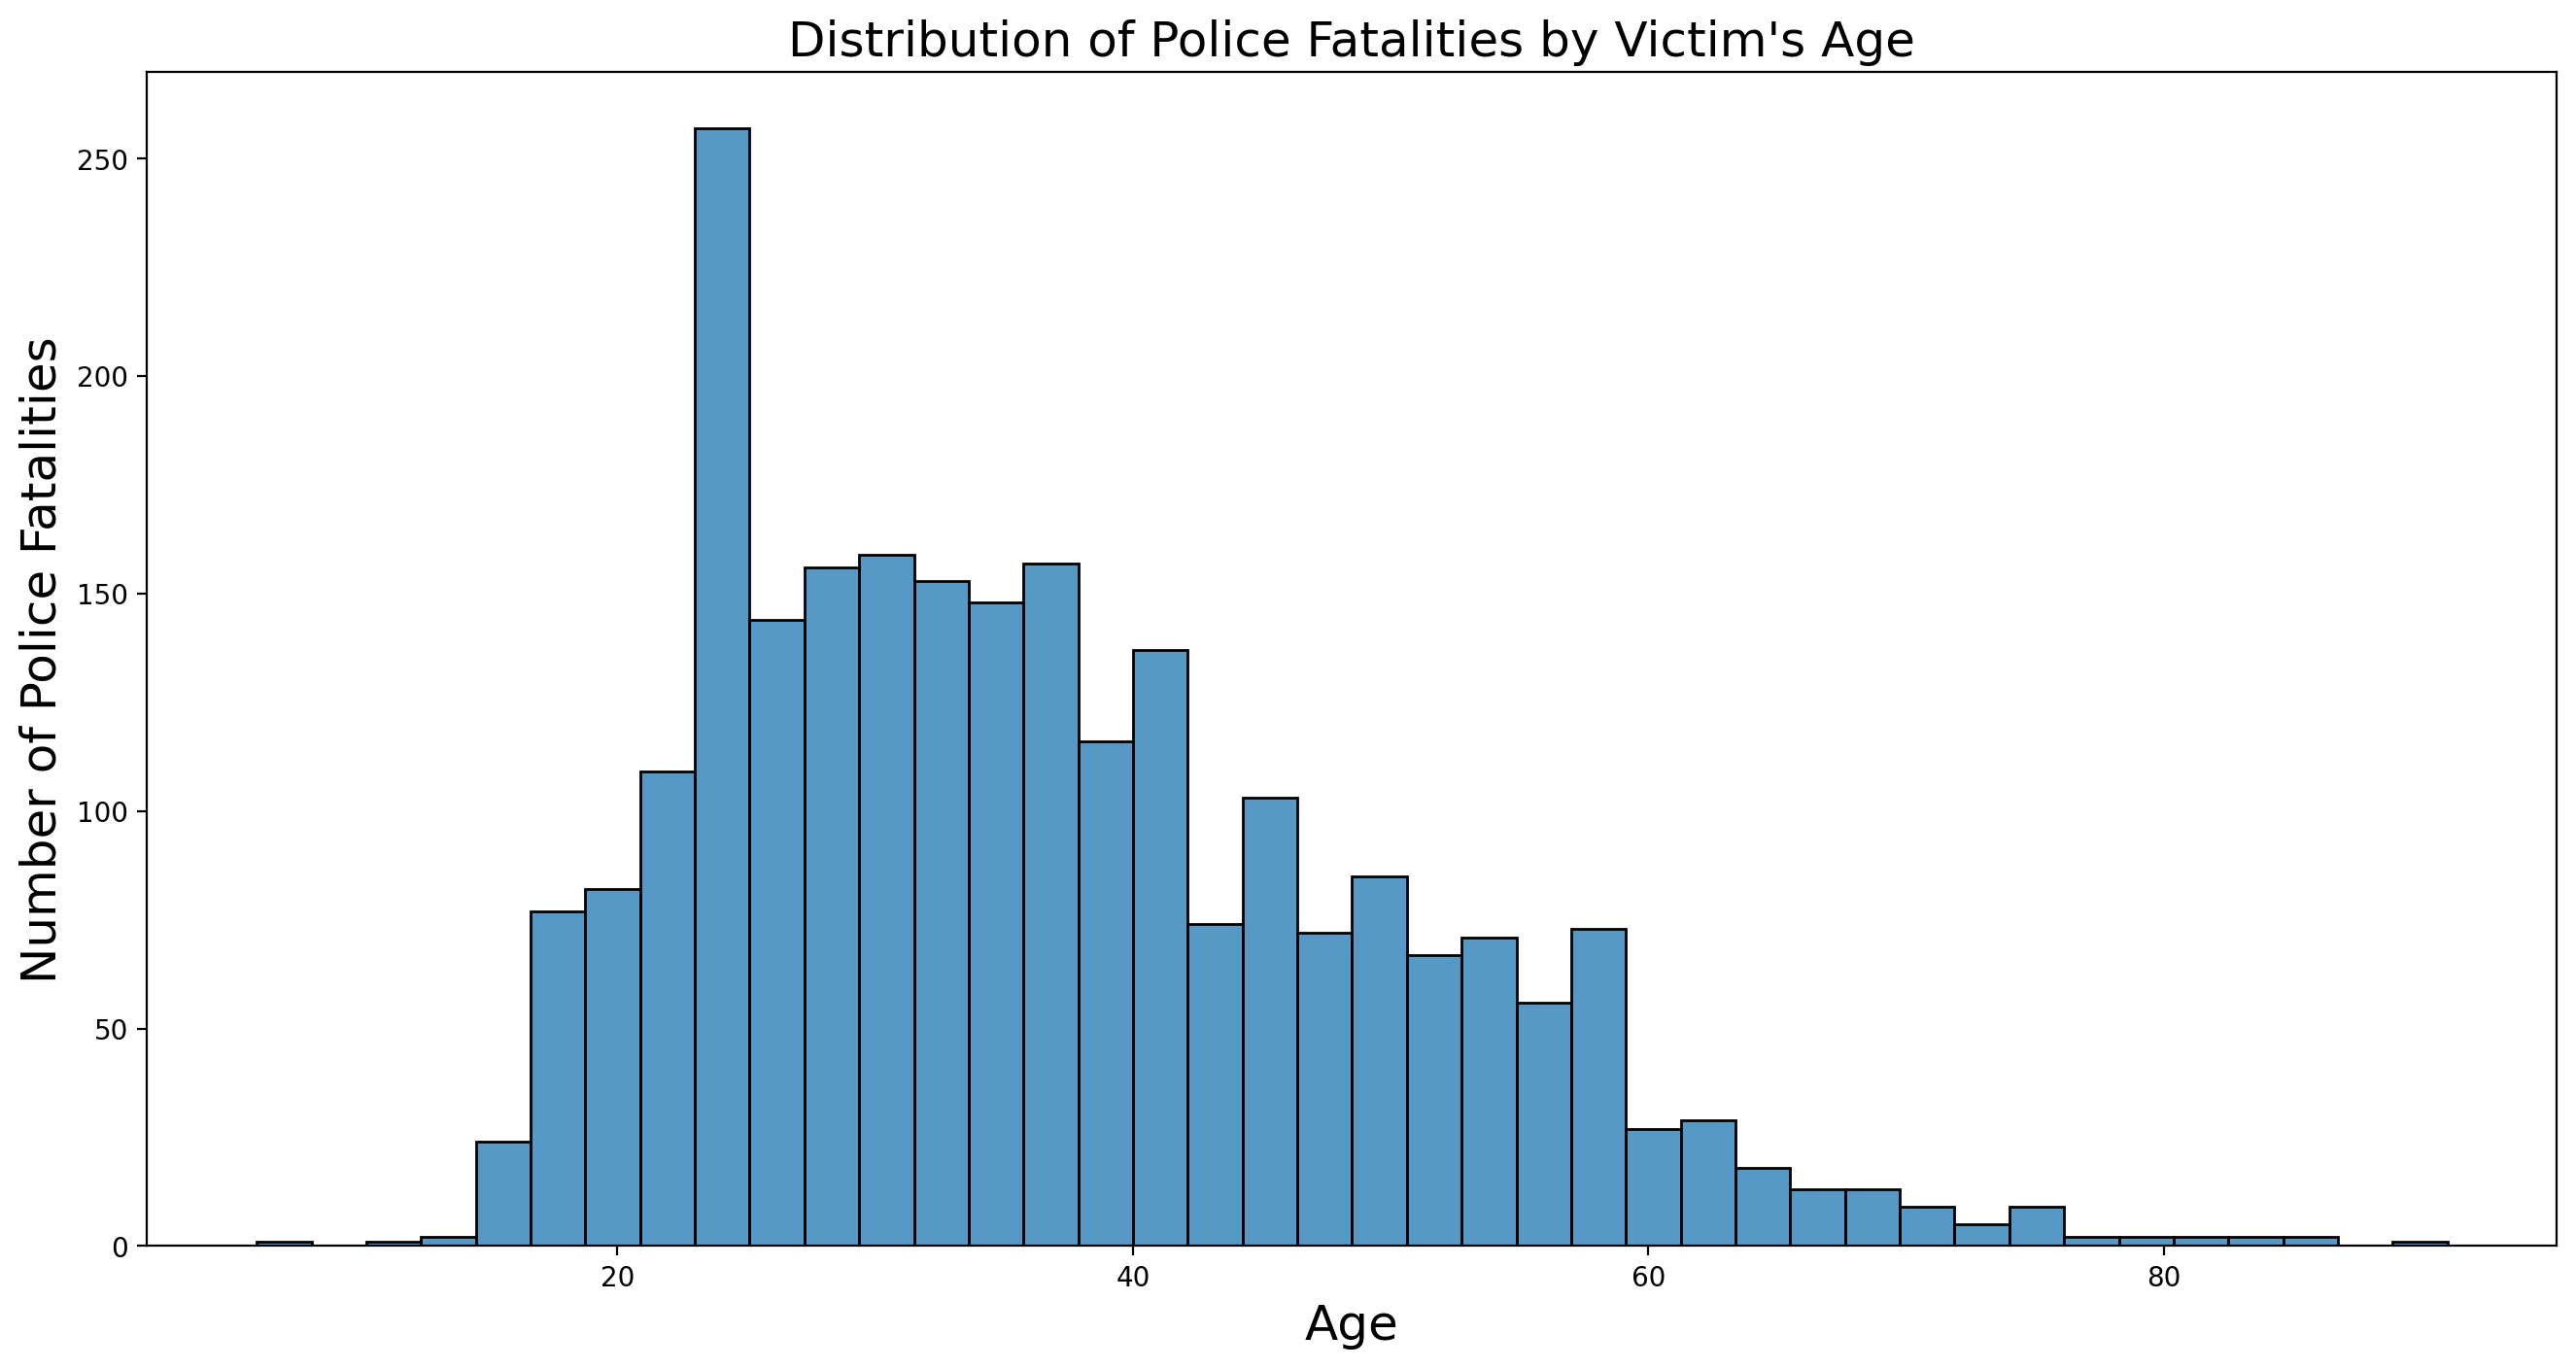

In [72]:
plt.figure(figsize=(16, 8), dpi=200)
plt.title("Distribution of Police Fatalities by Victim's Age", fontsize=18)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Number of Police Fatalities', fontsize=18)

sns.histplot(data=df_fatalities ,x='age',bins=40)

plt.show()

##### KDE Plot

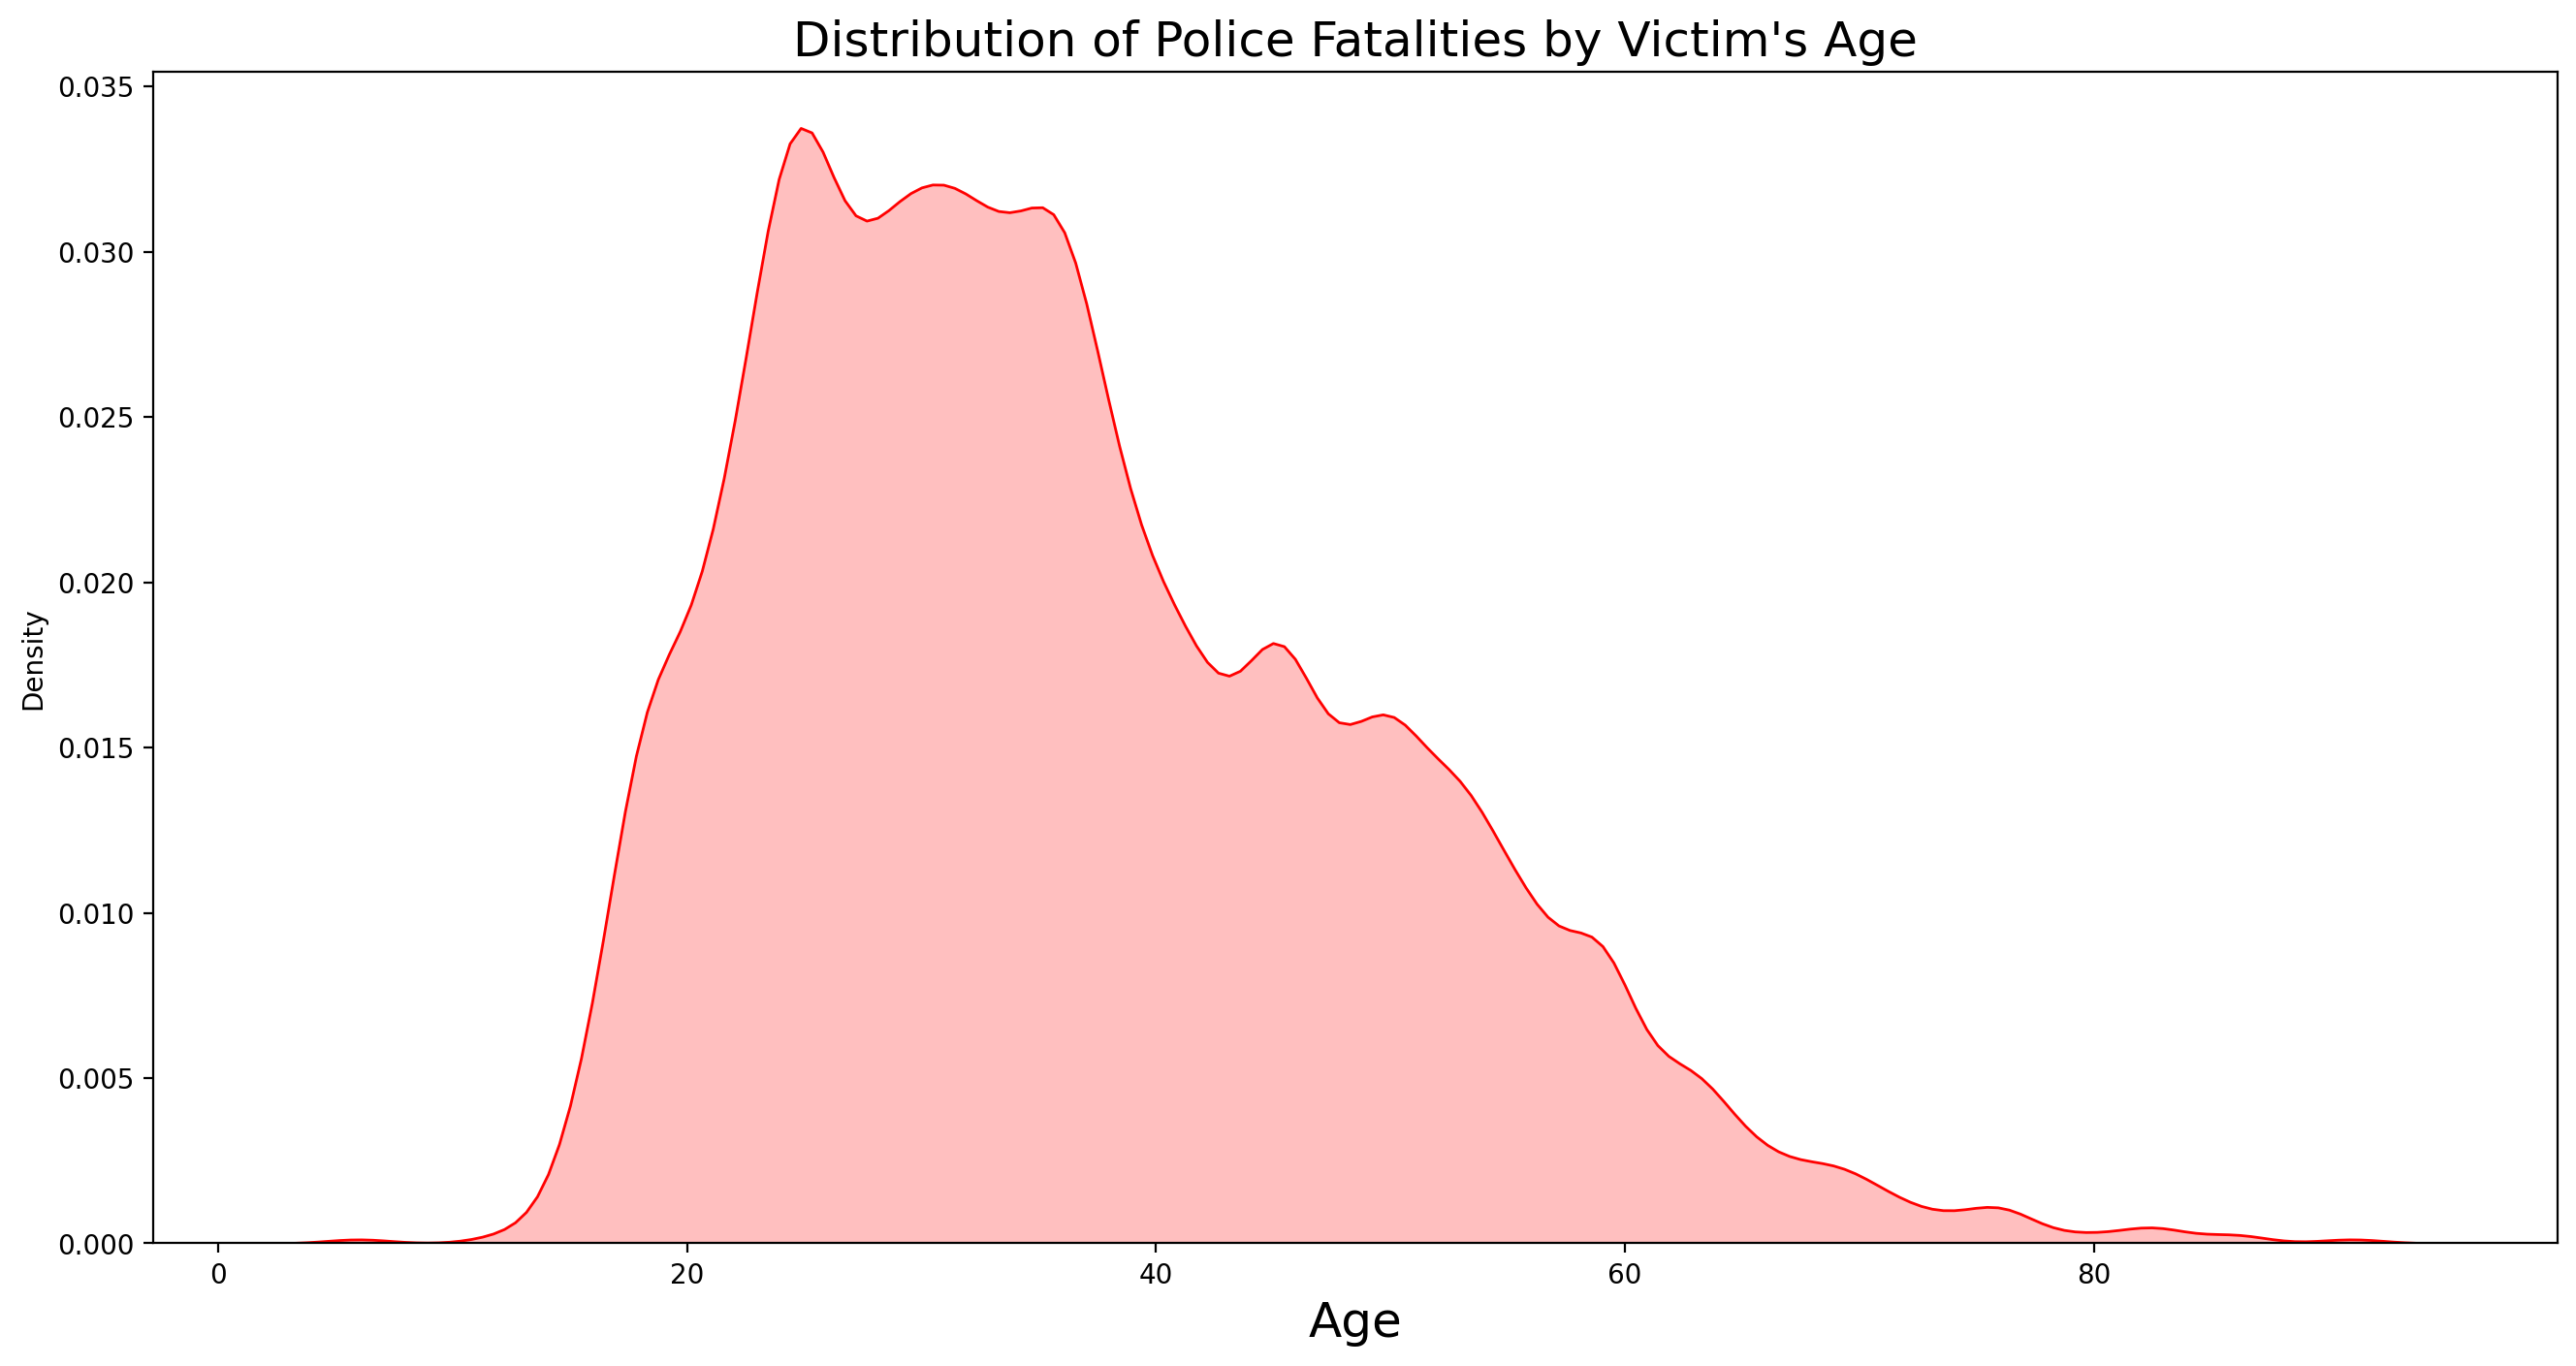

In [73]:
plt.figure(figsize=(16, 8), dpi=200)
plt.title("Distribution of Police Fatalities by Victim's Age", fontsize=18)
plt.xlabel('Age', fontsize=18)

sns.kdeplot(data=df_fatalities, x='age', bw_adjust=0.5, shade=True, color='red')

plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

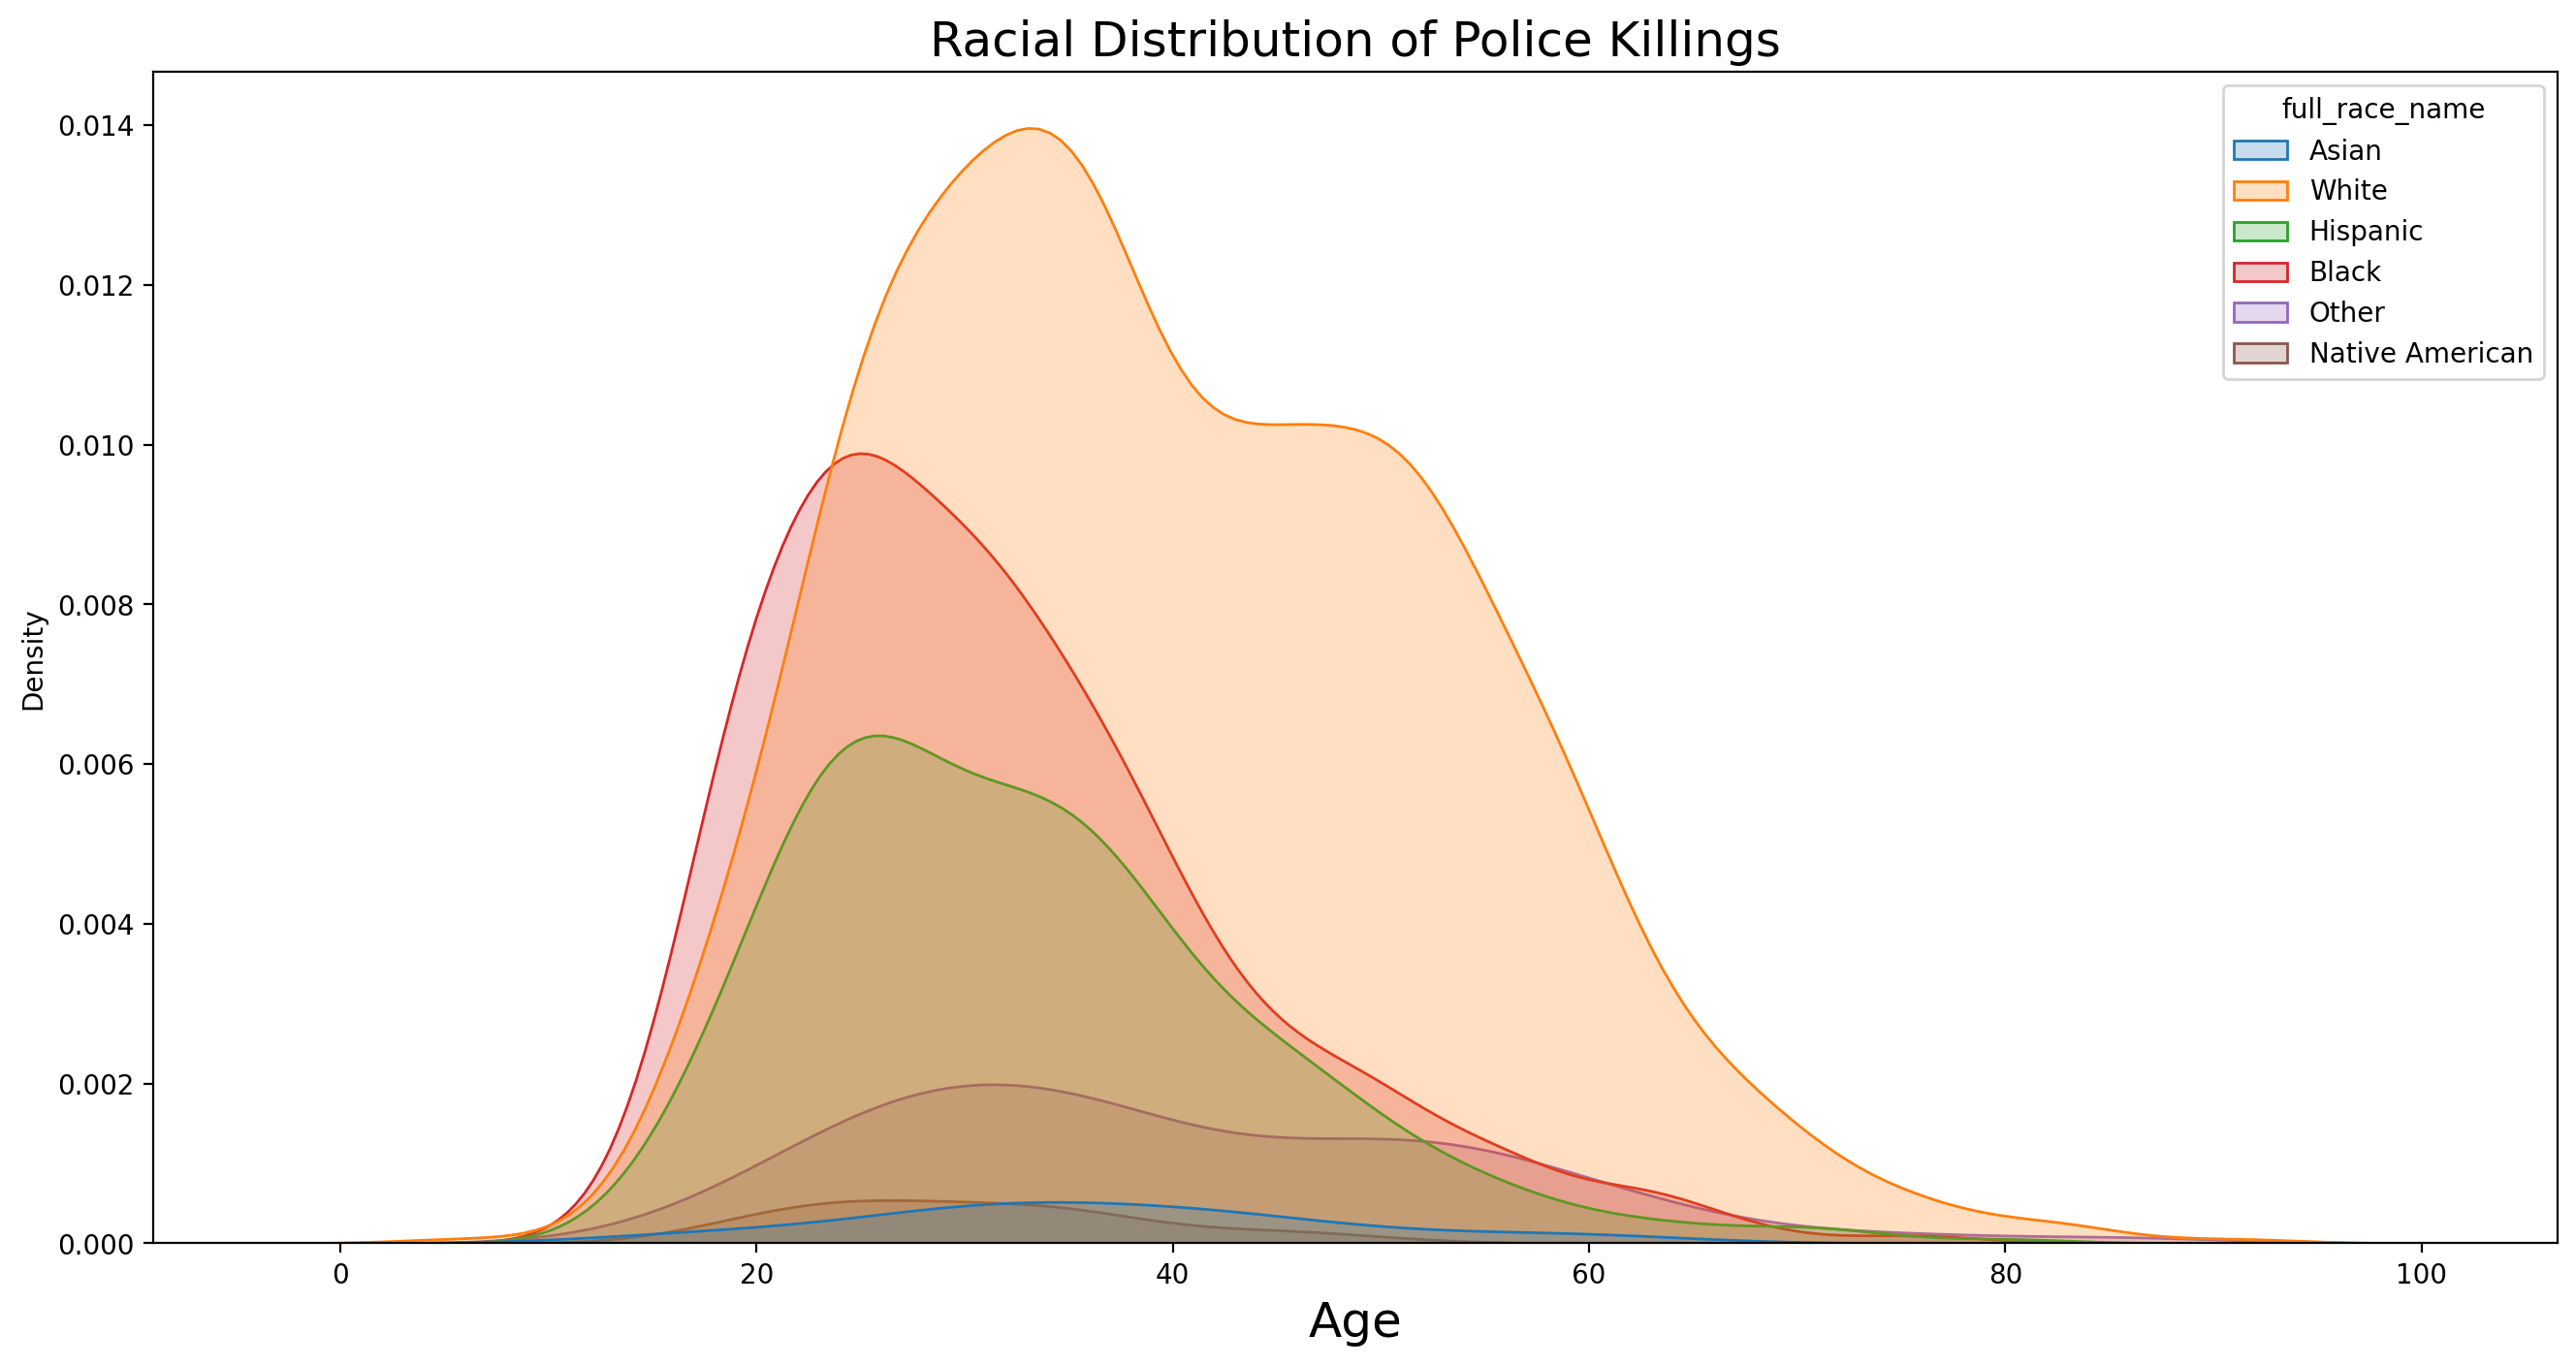

In [74]:
plt.figure(figsize=(16, 8), dpi=200)
plt.title('Racial Distribution of Police Killings', fontsize=18)
plt.xlabel('Age', fontsize=18)

sns.kdeplot(data=df_fatalities, x='age', hue='full_race_name', shade=True)

plt.show()

##### Conclusion
* There seems to be a difference between the distributions
* Victims of police killings that are `not identified as part of the white race` tend to be `younger`, particularly victims identified as being `black` or `hispanic`

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [75]:
bar = px.bar(x = total_fatalities_by_race.index, 
             y = total_fatalities_by_race.values, 
             title='Total Number of People Killed by the Police Distribuited By Race (Jan 2015 - Jul 2017)', 
             color = ['blue', 'red', 'green', 'purple', 'orange', 'lightblue'])

bar.update_layout(xaxis_title='Race', yaxis_title='Total Fatalities', showlegend=False)
bar.show()


# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [76]:
percentage_of_people_killed_by_police_diagnosed_with_mental_illness = round(len(df_fatalities[df_fatalities['signs_of_mental_illness'] == True]) / len(df_fatalities) * 100, 2)


In [77]:
percentage_of_people_killed_by_police_diagnosed_with_mental_illness

24.97

##### About `24.97%`  of people killed by the police have been diagnosed with a mental illness

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [78]:
top_10_cities_with_the_most_police_killings = df_fatalities['city'].value_counts()[0:10]

##### The Top 10 Most Dangerous Cities Are:

In [79]:
list_top_10_cities_with_the_most_police_killings = list(top_10_cities_with_the_most_police_killings.index)


In [80]:
list_top_10_cities_with_the_most_police_killings

['Los Angeles',
 'Phoenix',
 'Houston',
 'Chicago',
 'Las Vegas',
 'San Antonio',
 'Columbus',
 'Austin',
 'Miami',
 'St. Louis']

In [81]:
bar = px.bar(x = top_10_cities_with_the_most_police_killings.index, 
             y = top_10_cities_with_the_most_police_killings.values, 
             title='Top 10 Cities with the Most Police Killings (Jan 2015 - Jul 2017)', 
             color = ['blue', 'red', 'green', 'purple', 'orange', 
                      'lightblue', 'lightred', 'lightgreen', 'pink', 'yellow' ])

bar.update_layout(xaxis_title='City', 
                  yaxis_title='Total Fatalities in the City', 
                  showlegend=False)
bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

### Finding the share of each race in the Top 10 Cities with the Most Police Killings

##### Steps taken: 
* 1st line in each block -> get a dataframe for the specified city only
* 2nd line in each block -> renaming all entries in the city column to the city's `correct name` (ex: west Los Angeles => Los Angeles)
* 3rd line in each block -> group data by city so we get only one row in each dataframe

##### Los Angeles, California

In [82]:
df_share_race_los_angeles = df_share_race_city[(df_share_race_city['City'].str.contains('Los Angeles')) & (df_share_race_city['Geographic area'] == 'CA')]
df_share_race_los_angeles = df_share_race_los_angeles.assign(City='Los Angeles')
df_share_race_los_angeles = df_share_race_los_angeles.groupby('City', as_index=False).mean()


##### Phoenix, Arizona

In [83]:
df_share_race_phoenix = df_share_race_city[(df_share_race_city['City'].str.contains('Phoenix')) & (df_share_race_city['Geographic area'] == 'AZ')]
df_share_race_phoenix = df_share_race_phoenix.assign(City='Phoenix')
df_share_race_phoenix = df_share_race_phoenix.groupby('City', as_index=False).mean()


##### Houston, Texas

In [84]:
df_share_race_houston = df_share_race_city[(df_share_race_city['City'].str.contains('Houston')) & (df_share_race_city['Geographic area'] == 'TX')]
df_share_race_houston = df_share_race_houston.assign(City = 'Houston')
df_share_race_houston = df_share_race_houston.groupby('City', as_index=False).mean()


##### Chicago, Illinois

In [85]:
df_share_race_chicago = df_share_race_city[(df_share_race_city['City'].str.contains('Chicago')) & (df_share_race_city['Geographic area'] == 'IL')]
df_share_race_chicago = df_share_race_chicago.assign(City = 'Chicago')
df_share_race_chicago = df_share_race_chicago.groupby('City', as_index=False).mean()


##### Las Vegas, Nevada

In [86]:
df_share_race_las_vegas = df_share_race_city[(df_share_race_city['City'].str.contains('Las Vegas')) & (df_share_race_city['Geographic area'] == 'NV')]
df_share_race_las_vegas = df_share_race_las_vegas.assign(City = 'Las Vegas')
df_share_race_las_vegas = df_share_race_las_vegas.groupby('City', as_index=False).mean()


##### San Antonio, Texas

In [87]:
df_share_race_san_antonio = df_share_race_city[(df_share_race_city['City'].str.contains('San Antonio')) & (df_share_race_city['Geographic area'] == 'TX')]
df_share_race_san_antonio = df_share_race_san_antonio.assign(City = 'San Antonio')
df_share_race_san_antonio = df_share_race_san_antonio.groupby('City', as_index=False).mean()


###### Columbus, Ohio

In [88]:
df_share_race_columbus = df_share_race_city[(df_share_race_city['City'].str.contains('Columbus')) & (df_share_race_city['Geographic area'] == 'OH')]
df_share_race_columbus = df_share_race_columbus.assign(City = 'Columbus')
df_share_race_columbus = df_share_race_columbus.groupby('City', as_index=False).mean()


##### Austin, Texas

In [89]:
df_share_race_austin = df_share_race_city[(df_share_race_city['City'].str.contains('Austin')) & (df_share_race_city['Geographic area'] == 'TX')]
df_share_race_austin = df_share_race_austin.assign(City = 'Austin')
df_share_race_austin = df_share_race_austin.groupby('City', as_index=False).mean()


##### Miami, Florida

In [90]:
df_share_race_miami = df_share_race_city[(df_share_race_city['City'].str.contains('Miami')) & (df_share_race_city['Geographic area'] == 'FL')]
df_share_race_miami = df_share_race_miami.assign(City = 'Miami')
df_share_race_miami = df_share_race_miami.groupby('City', as_index=False).mean()


##### St. Louis, Missouri

In [91]:
df_share_race_st_louis = df_share_race_city[(df_share_race_city['City'].str.contains('St. Louis')) & (df_share_race_city['Geographic area'] == 'MO')]
df_share_race_st_louis = df_share_race_st_louis.assign(City = 'St. Louis')
df_share_race_st_louis = df_share_race_st_louis.groupby('City', as_index=False).mean()


### Combining all dataframes `df_share_race_<top-10-city-name>` into one dataframe

In [92]:
all_race_city_dfs = (
    df_share_race_los_angeles, df_share_race_phoenix, df_share_race_houston, 
    df_share_race_chicago, df_share_race_las_vegas, df_share_race_san_antonio, 
    df_share_race_columbus, df_share_race_austin, df_share_race_miami, 
    df_share_race_st_louis
)

In [93]:
df_share_race_top_10_cities = pandas.concat(all_race_city_dfs, ignore_index = True)

##### Rounding every value at once

In [94]:
df_share_race_top_10_cities = df_share_race_top_10_cities.round(2)

##### Final dataframe

In [95]:
df_share_race_top_10_cities

City  share_white  share_black  share_native_american  share_asian  \
0  Los Angeles        51.44         4.60                   0.90         2.98   
1      Phoenix        55.56         5.48                   1.85         2.70   
2      Houston        41.24         9.99                   0.56         2.60   
3      Chicago        50.59        19.30                   0.48         2.66   
4    Las Vegas        48.78        13.77                   0.67         5.52   
5  San Antonio        49.73         4.73                   0.62         1.64   
6     Columbus        77.72        14.47                   0.45         2.16   
7       Austin        57.54         6.82                   0.76         5.31   
8        Miami        44.65        19.13                   0.17         1.27   
9    St. Louis        67.86        26.54                   0.30         2.50   

   share_hispanic  
0           40.08  
1           34.40  
2           45.61  
3           26.97  
4           31.26  
5           43.29  
6            5.20  
7           29.57  
8           34.77  
9            2.80

### Finding the `percentage` of people killed by the police `by race` in each of the Top 10 Cities with the Most Police Killings 
* Given we are charting the death rate by race, we are `not going to consider` the entries in which the race is labeled as `Other`

##### Steps taken: 
* 1st line in each block -> get only fatalities for the specified city
* 2nd line in each block -> get the percentages of people killed by the police by race
* 3rd line in each block -> assign the specified city's name to the series so that all series can be merged with each other

##### Los Angeles, California

In [96]:
df_los_angeles = df_fatalities[(df_fatalities['city'] == 'Los Angeles') & (df_fatalities['full_race_name'] != 'Other')]
df_los_angeles_pct_killed_by_race = round(df_los_angeles.value_counts('full_race_name') / len(df_los_angeles) * 100, 2)
df_los_angeles_pct_killed_by_race = pandas.Series(df_los_angeles_pct_killed_by_race, name ='Los Angeles')


##### Phoenix, Arizona

In [97]:
df_phoenix = df_fatalities[(df_fatalities['city'] == 'Phoenix') & (df_fatalities['full_race_name'] != 'Other')]
df_phoenix_pct_killed_by_race = round(df_phoenix.value_counts('full_race_name') / len(df_phoenix) * 100, 2)
df_phoenix_pct_killed_by_race = pandas.Series(df_phoenix_pct_killed_by_race, name ='Phoenix')


##### Houston, Texas

In [98]:
df_houston = df_fatalities[(df_fatalities['city'] == 'Houston') & (df_fatalities['full_race_name'] != 'Other')]
df_houston_pct_killed_by_race = round(df_houston.value_counts('full_race_name') / len(df_houston) * 100, 2)
df_houston_pct_killed_by_race = pandas.Series(df_houston_pct_killed_by_race, name ='Houston')


##### Chicago, Illinois

In [99]:
df_chicago = df_fatalities[(df_fatalities['city'] == 'Chicago') & (df_fatalities['full_race_name'] != 'Other')]
df_chicago_pct_killed_by_race = round(df_chicago.value_counts('full_race_name') / len(df_chicago) * 100, 2)
df_chicago_pct_killed_by_race = pandas.Series(df_chicago_pct_killed_by_race, name ='Chicago')


##### Las Vegas, Nevada

In [100]:
df_las_vegas = df_fatalities[(df_fatalities['city'] == 'Las Vegas') & (df_fatalities['full_race_name'] != 'Other')]
df_las_vegas_pct_killed_by_race = round(df_las_vegas.value_counts('full_race_name') / len(df_las_vegas) * 100, 2)
df_las_vegas_pct_killed_by_race = pandas.Series(df_las_vegas_pct_killed_by_race, name ='Las Vegas')


##### San Antonio, Texas

In [101]:
df_san_antonio = df_fatalities[(df_fatalities['city'] == 'San Antonio') & (df_fatalities['full_race_name'] != 'Other')]
df_san_antonio_pct_killed_by_race = round(df_san_antonio.value_counts('full_race_name') / len(df_san_antonio) * 100, 2)
df_san_antonio_pct_killed_by_race = pandas.Series(df_san_antonio_pct_killed_by_race, name ='San Antonio')


##### Columbus, Ohio

In [102]:
df_columbus = df_fatalities[(df_fatalities['city'] == 'Columbus') & (df_fatalities['full_race_name'] != 'Other')]
df_columbus_pct_killed_by_race = round(df_columbus.value_counts('full_race_name') / len(df_columbus) * 100, 2)
df_columbus_pct_killed_by_race = pandas.Series(df_columbus_pct_killed_by_race, name ='Columbus')


##### Austin, Texas

In [103]:
df_austin = df_fatalities[(df_fatalities['city'] == 'Austin') & (df_fatalities['full_race_name'] != 'Other')]
df_austin_pct_killed_by_race = round(df_austin.value_counts('full_race_name') / len(df_austin) * 100, 2)
df_austin_pct_killed_by_race = pandas.Series(df_austin_pct_killed_by_race, name ='Austin')


##### Miami, Florida

In [104]:
df_miami = df_fatalities[(df_fatalities['city'] == 'Miami') & (df_fatalities['full_race_name'] != 'Other')]
df_miami_pct_killed_by_race = round(df_miami.value_counts('full_race_name') / len(df_miami) * 100, 2)
df_miami_pct_killed_by_race = pandas.Series(df_miami_pct_killed_by_race, name ='Miami')


##### St. Louis, Missouri

In [105]:
df_st_louis = df_fatalities[(df_fatalities['city'] == 'St. Louis') & (df_fatalities['full_race_name'] != 'Other')]
df_st_louis_pct_killed_by_race = round(df_st_louis.value_counts('full_race_name') / len(df_st_louis) * 100, 2)
df_st_louis_pct_killed_by_race = pandas.Series(df_st_louis_pct_killed_by_race, name ='St. Louis')


### Combining all series `df_<top-10-city-name>_pct_killed_by_race` into one dataframe

In [106]:
# Going to need .reduce() method
from functools import reduce

In [107]:
all_pct_killed_by_race_series = [
    df_los_angeles_pct_killed_by_race, df_phoenix_pct_killed_by_race, 
    df_houston_pct_killed_by_race, df_chicago_pct_killed_by_race, 
    df_las_vegas_pct_killed_by_race, df_san_antonio_pct_killed_by_race, 
    df_columbus_pct_killed_by_race, df_austin_pct_killed_by_race, 
    df_miami_pct_killed_by_race, df_st_louis_pct_killed_by_race
]

##### Combining

In [108]:
df_pct_race_killed_top_10_cities = reduce(lambda left, right: pandas.merge(
    left, 
    right, 
    on=['full_race_name'], 
    how='outer'), all_pct_killed_by_race_series).fillna(0).transpose().reset_index()

##### Making some ajustments

In [109]:
df_pct_race_killed_top_10_cities.columns = ['City', 
                                            'pct_hispanic_killed', 
                                            'pct_black_killed', 
                                            'pct_white_killed', 
                                            'pct_asian_killed', 
                                            'pct_native_american_killed']

##### Final dataframe

In [110]:
df_pct_race_killed_top_10_cities

City  pct_hispanic_killed  pct_black_killed  pct_white_killed  \
0  Los Angeles                52.78             27.78             16.67   
1      Phoenix                39.29              7.14             42.86   
2      Houston                23.08             57.69             11.54   
3      Chicago                 4.17             87.50              8.33   
4    Las Vegas                29.41             17.65             52.94   
5  San Antonio                66.67             16.67             16.67   
6     Columbus                 0.00             64.71             35.29   
7       Austin                11.11             16.67             72.22   
8        Miami                35.29             47.06             17.65   
9    St. Louis                 0.00             78.57             21.43   

   pct_asian_killed  pct_native_american_killed  
0              2.78                        0.00  
1              0.00                       10.71  
2              3.85                        3.85  
3              0.00                        0.00  
4              0.00                        0.00  
5              0.00                        0.00  
6              0.00                        0.00  
7              0.00                        0.00  
8              0.00                        0.00  
9              0.00                        0.00

##### Now that we have:
* `df_share_race_top_10_cities` which represents the population distribution of the cities in questions by race

* `df_pct_race_killed_top_10_cities` which represents the population distribution of the people killed by the police in the cities in question by race

We are going to compared both sets of data

##### Bar chart - Population's Racial Distribution in the Top 10 cities with the Most Police Killings

In [111]:
fig = go.Figure()

fig.add_trace(go.Bar(x = df_share_race_top_10_cities['City'], 
                     y = df_share_race_top_10_cities['share_white'],
                     width = 0.5, 
                     name = 'White',
                     text = df_share_race_top_10_cities['share_white']))

fig.add_trace(go.Bar(x = df_share_race_top_10_cities['City'], 
                     y = df_share_race_top_10_cities['share_black'],
                     width = 0.5, 
                     name = 'Black',
                     text = df_share_race_top_10_cities['share_black']))

fig.add_trace(go.Bar(x = df_share_race_top_10_cities['City'], 
                     y = df_share_race_top_10_cities['share_native_american'],
                     width = 0.5, 
                     name = 'Native American',
                     text = df_share_race_top_10_cities['share_native_american']))

fig.add_trace(go.Bar(x = df_share_race_top_10_cities['City'], 
                     y = df_share_race_top_10_cities['share_asian'],
                     width = 0.5, 
                     name = 'Asian',
                     text = df_share_race_top_10_cities['share_asian']))

fig.add_trace(go.Bar(x = df_share_race_top_10_cities['City'], 
                     y = df_share_race_top_10_cities['share_hispanic'],
                     width = 0.5, 
                     name = 'Hispanic',
                     text = df_share_race_top_10_cities['share_hispanic']))


fig.update_layout(
    title = "Population's Racial Distribution by City", 
    barmode = 'relative', 
    title_font_size = 20, 
    width = 800, 
    height = 600
)


fig.update_layout(
    legend=go.layout.Legend(
        x=1,
        y=1, 
        traceorder= "normal", 
        font=dict(family="Verdana",size= 14, color = "black")
    )
)


fig.update_xaxes(
    title_text = 'City', 
    title_font=dict(size=17,family='Verdana',color='black'),
    tickfont=dict(family='Calibri', color='darkred', size=17)
)


fig.update_yaxes(
    title_text = "Percentage (%)", 
    title_font=dict(size=17, family='Verdana', color='black'),
    tickfont=dict(family='Calibri', color='darkred', size=17)
)


fig.show()

##### Bar chart - Racial Distribution of People Killed By the Police by City in the Top 10 cities with the Most Police Killings

In [112]:
fig = go.Figure()

fig.add_trace(go.Bar(x = df_pct_race_killed_top_10_cities['City'], 
                     y = df_pct_race_killed_top_10_cities['pct_white_killed'],
                     width = 0.5, 
                     name = 'White',
                     text = df_pct_race_killed_top_10_cities['pct_white_killed']))

fig.add_trace(go.Bar(x = df_pct_race_killed_top_10_cities['City'], 
                     y = df_pct_race_killed_top_10_cities['pct_black_killed'],
                     width = 0.5, 
                     name = 'Black',
                     text = df_pct_race_killed_top_10_cities['pct_black_killed']))

fig.add_trace(go.Bar(x = df_pct_race_killed_top_10_cities['City'], 
                     y = df_pct_race_killed_top_10_cities['pct_native_american_killed'],
                     width = 0.5, 
                     name = 'Native American',
                     text = df_pct_race_killed_top_10_cities['pct_native_american_killed']))

fig.add_trace(go.Bar(x = df_pct_race_killed_top_10_cities['City'], 
                     y = df_pct_race_killed_top_10_cities['pct_asian_killed'],
                     width = 0.5, 
                     name = 'Asian',
                     text = df_pct_race_killed_top_10_cities['pct_asian_killed']))

fig.add_trace(go.Bar(x = df_pct_race_killed_top_10_cities['City'], 
                     y = df_pct_race_killed_top_10_cities['pct_hispanic_killed'],
                     width = 0.5, 
                     name = 'Hispanic',
                     text = df_pct_race_killed_top_10_cities['pct_hispanic_killed']))


fig.update_layout(
    title = "Racial Distribution of People Killed by the Police by City", 
    barmode = 'relative', 
    title_font_size = 20, 
    width = 800, 
    height = 600
)


fig.update_layout(
    legend=go.layout.Legend(
        x=1,
        y=1, 
        traceorder= "normal", 
        font=dict(family="Verdana",size= 14, color = "black")
    )
)


fig.update_xaxes(
    title_text = 'City', 
    title_font=dict(size=17,family='Verdana',color='black'),
    tickfont=dict(family='Calibri', color='darkred', size=17)
)


fig.update_yaxes(
    title_text = "Percentage (%)", 
    title_font=dict(size=17, family='Verdana', color='black'),
    tickfont=dict(family='Calibri', color='darkred', size=17)
)


fig.show()

### Average rates

##### Creating a dataframe for each racial population's distribution per city

In [113]:
white_population_per_city = df_share_race_top_10_cities[['City', 'share_white']].sort_values('share_white', ascending=False)
black_population_per_city = df_share_race_top_10_cities[['City', 'share_black']].sort_values('share_black', ascending=False)
native_american_population_per_city = df_share_race_top_10_cities[['City', 'share_native_american']].sort_values('share_native_american', ascending=False)
asian_population_per_city = df_share_race_top_10_cities[['City', 'share_asian']].sort_values('share_asian', ascending=False)
hispanic_population_per_city = df_share_race_top_10_cities[['City', 'share_hispanic']].sort_values('share_hispanic', ascending=False)


##### Creating a dataframe for each racial population's distribution of people killed by the police per city

In [114]:
white_population_killed_by_police = df_pct_race_killed_top_10_cities[['City', 'pct_white_killed']].sort_values('pct_white_killed', ascending=False)
black_population_killed_by_police = df_pct_race_killed_top_10_cities[['City', 'pct_black_killed']].sort_values('pct_black_killed', ascending=False)
native_american_population_killed_by_police = df_pct_race_killed_top_10_cities[['City', 'pct_native_american_killed']].sort_values('pct_native_american_killed', ascending=False)
asian_population_killed_by_police = df_pct_race_killed_top_10_cities[['City', 'pct_asian_killed']].sort_values('pct_asian_killed', ascending=False)
hispanic_population_killed_by_police = df_pct_race_killed_top_10_cities[['City', 'pct_hispanic_killed']].sort_values('pct_hispanic_killed', ascending=False)


##### Combining the above dataframes by race
* Note: values zero do not necesseraly mean zero, just a very small value

##### White

In [115]:
df_white = pandas.merge(white_population_per_city, white_population_killed_by_police, on='City', how='inner')
df_white.columns = ['City', 'population_pct_white', 'killed_pct_white']


##### Black

In [116]:
df_black = pandas.merge(black_population_per_city, black_population_killed_by_police, on='City', how='inner')
df_black.columns = ['City', 'population_pct_black', 'killed_pct_black']


##### Native American

In [117]:
df_native_american = pandas.merge(native_american_population_per_city, native_american_population_killed_by_police, on='City', how='inner')
df_native_american.columns = ['City', 'population_pct_native_american', 'killed_pct_native_american']


##### Asian

In [118]:
df_asian = pandas.merge(asian_population_per_city, asian_population_killed_by_police, on='City', how='inner')
df_asian.columns = ['City', 'population_pct_asian', 'killed_pct_asian']


##### Hispanic

In [119]:
df_hispanic = pandas.merge(hispanic_population_per_city, hispanic_population_killed_by_police, on='City', how='inner')
df_hispanic.columns = ['City', 'population_pct_hispanic', 'killed_pct_hispanic']


##### Merging all five dataframes by race created

In [120]:
all_dfs_by_race = [df_white, df_black, df_native_american, df_asian, df_hispanic]

In [121]:
df_pop_pct_killed_pct_by_race = reduce(lambda left, right: pandas.merge(left, 
                                                                        right, 
                                                                        on=['City'], 
                                                                        how='outer'), 
                                                                        all_dfs_by_race)

In [122]:
df_pop_pct_killed_pct_by_race

City  population_pct_white  killed_pct_white  population_pct_black  \
0     Columbus                 77.72             35.29                 14.47   
1    St. Louis                 67.86             21.43                 26.54   
2       Austin                 57.54             72.22                  6.82   
3      Phoenix                 55.56             42.86                  5.48   
4  Los Angeles                 51.44             16.67                  4.60   
5      Chicago                 50.59              8.33                 19.30   
6  San Antonio                 49.73             16.67                  4.73   
7    Las Vegas                 48.78             52.94                 13.77   
8        Miami                 44.65             17.65                 19.13   
9      Houston                 41.24             11.54                  9.99   

   killed_pct_black  population_pct_native_american  \
0             64.71                            0.45   
1             78.57                            0.30   
2             16.67                            0.76   
3              7.14                            1.85   
4             27.78                            0.90   
5             87.50                            0.48   
6             16.67                            0.62   
7             17.65                            0.67   
8             47.06                            0.17   
9             57.69                            0.56   

   killed_pct_native_american  population_pct_asian  killed_pct_asian  \
0                        0.00                  2.16              0.00   
1                        0.00                  2.50              0.00   
2                        0.00                  5.31              0.00   
3                       10.71                  2.70              0.00   
4                        0.00                  2.98              2.78   
5                        0.00                  2.66              0.00   
6                        0.00                  1.64              0.00   
7                        0.00                  5.52              0.00   
8                        0.00                  1.27              0.00   
9                        3.85                  2.60              3.85   

   population_pct_hispanic  killed_pct_hispanic  
0                     5.20                 0.00  
1                     2.80                 0.00  
2                    29.57                11.11  
3                    34.40                39.29  
4                    40.08                52.78  
5                    26.97                 4.17  
6                    43.29                66.67  
7                    31.26                29.41  
8                    34.77                35.29  
9                    45.61                23.08

##### Conclusions
One of the most glaring aspects about comparing these two graphs and the dataframes is noticing that the black population, despite making never ranking at the top of the population in any of the cities in question - ranking instead between second and third place, mostly third, behind the white population and hispanic population, and by a `long margin` - the black population `consistently` ranks as the `number 1` population `shot and killed` by the police - ranking first in 5 out of the 10 cities in question. 

`In Chicago, for instance, the black population makes up about 19.3% of the city's total population and about 87.5% of the total population killed by the police`

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [123]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
}

In [124]:
def get_full_state_name(input_state_code):
    for state_name, state_code in us_state_to_abbrev.items():
        if state_code == input_state_code:
            return state_name

##### Creating a dataframe of number of fatalities by state

In [125]:
number_of_fatalities_by_state = pandas.DataFrame(df_fatalities.value_counts('state'), columns = ['Number of Fatalities']).reset_index()


##### Adding a column with the help of the dictionary `us_state_to_abbrev`and function `get_full_state_name`
* Note: we are adding this column to show the full state name when the user hovers over the state

In [126]:
number_of_fatalities_by_state['full_state_name'] = number_of_fatalities_by_state['state'].apply(get_full_state_name)


##### The Top 10 Most Dangerous States Are:

In [127]:
list(number_of_fatalities_by_state[0:10]['full_state_name'])

['California',
 'Texas',
 'Florida',
 'Arizona',
 'Ohio',
 'Oklahoma',
 'Colorado',
 'Georgia',
 'North Carolina',
 'Missouri']

##### Choropleth Map

In [128]:
us_map = px.choropleth(number_of_fatalities_by_state, 
                       locations='state', 
                       color='Number of Fatalities', 
                       hover_name='full_state_name', 
                       color_continuous_scale=px.colors.sequential.matter, 
                       scope='usa', 
                       locationmode='USA-states')

us_map.update_layout(title="Number of Police Caused Fatalities by US State", 
                     coloraxis_showscale=True,
                     geo_scope='usa')

us_map.show()

##### Conclusion:
* `7 of the top 10 most dangerous cities` (Los Angeles, Phoenix, Houston, San Antonio, Columbus, Austin, Miami) are `all located in the top 5 most dangerous states` (California, Texas, Florida, Arizona, Ohio)

##### Are these the same states with high degrees of poverty? 

In [129]:
top_10_states_with_the_highest_povert_rate = df_poverty_rate_by_state[0:10]

In [130]:
list(top_10_states_with_the_highest_povert_rate['Geographic Area'].apply(get_full_state_name))

['Mississippi',
 'Arizona',
 'Georgia',
 'New Mexico',
 'Arkansas',
 'Louisiana',
 'South Carolina',
 'West Virginia',
 'Oklahoma',
 'Alabama']

##### Conclusion:
* `Out of the Top 10 Most Dangerous States`, `3` of them (Arizona, Georgia and Oklahoma) are `also part of the Top 10 States with the Highest Poverty Rate`

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

##### Convertind `date` column to a `datetime` object

In [131]:
# First of all, the date column clearly has the format day-month-year
df_fatalities['date']

0       02/01/15
1       02/01/15
2       03/01/15
3       04/01/15
4       04/01/15
          ...   
2530    28/07/17
2531    28/07/17
2532    29/07/17
2533    31/07/17
2534    31/07/17
Name: date, Length: 2535, dtype: object

In [132]:
# However, when we do a simple datetime conversion:
# 1) we can see that the tail has the format year-month-day
# 2) BUT THE HEAD HAS THE FORMAT YEAR-DAY-MONTH - WHICH IS A MISTAKE
pandas.to_datetime(df_fatalities['date'])

0      2015-02-01
1      2015-02-01
2      2015-03-01
3      2015-04-01
4      2015-04-01
          ...    
2530   2017-07-28
2531   2017-07-28
2532   2017-07-29
2533   2017-07-31
2534   2017-07-31
Name: date, Length: 2535, dtype: datetime64[ns]

In [133]:
# We are going to prevent such a mistake in the datetime conversion
date_dict = {
    '01': 'January',
    '02': 'February',
    '03': 'March',
    '04': 'April',
    '05': 'May',
    '06': 'June',
    '07': 'July',
    '08': 'August',
    '09': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December'  
}

def month_number_to_name(input_date):
    day = input_date[0]
    month = input_date[1]
    year = input_date[2]
    if str(month) in date_dict.keys():
        return str(day) + '-' + date_dict[str(month)] + '-' + '20' + str(year)

In [134]:
df_fatalities['date'] = pandas.to_datetime(df_fatalities['date'].str.split('/').apply(month_number_to_name))


In [135]:
# Mistake avoided
df_fatalities['date']

0      2015-01-02
1      2015-01-02
2      2015-01-03
3      2015-01-04
4      2015-01-04
          ...    
2530   2017-07-28
2531   2017-07-28
2532   2017-07-29
2533   2017-07-31
2534   2017-07-31
Name: date, Length: 2535, dtype: datetime64[ns]

##### Creating a column in which the date only consists of `month` and `year`

In [136]:
df_fatalities['year_and_month'] = pandas.to_datetime(df_fatalities['date'].dt.strftime('%Y-%m'))


##### Counting the number of fatalities per month in each year

In [137]:
fatalities_per_month_per_year = df_fatalities['year_and_month'].value_counts()

##### Visualising with a Scatter Plot

In [138]:
scatter = px.scatter(fatalities_per_month_per_year,
                    x=fatalities_per_month_per_year.index, 
                    y=fatalities_per_month_per_year.values,
                    title='Number of Police Killings Over Time',
                    color=fatalities_per_month_per_year.values)

scatter.update_layout(xaxis_title="Date",
                      yaxis_title="Total Number of Police Killings")
    
scatter.layout.coloraxis.colorbar.title = 'Police Killings in the Month'

scatter.show()

##### Conclusion
* The number of police killings seem to be greater in the `summer months` - around the month of `July`

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).

---